In [1]:
import numpy as np
import pandas as pd
#import hyperopt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt # For plotting graphs 
%matplotlib inline 
import os
from numpy import set_printoptions
import warnings
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression


In [2]:
warnings.filterwarnings('ignore') # if there are any warning due to version mismatch, it will be ignored
np.set_printoptions(suppress=True,formatter={'float_kind':'{:f}'.format})

In [3]:
churn = pd.read_csv("Churn.csv", low_memory=False)

In [4]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
churn.isnull().sum() # checking for total na's for each column
churn2 = churn.copy() 

In [6]:
churn.columns # Viewing column of interest

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
churn.shape # we can see that we have a total of 1000 observations and 14 columns including the labels

(10000, 14)

In [8]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Removing Unimportant columns

In [9]:
churn = churn.drop(['RowNumber', 'CustomerId','Surname'] , 1) 
# since they cant give us important information about the dependent  variable

In [10]:
churn.corr(method='pearson')

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


### The skew result show a positive (right) or negative (left) skew.
### Values closer to zero show less skew

In [11]:
churn.skew()

CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

In [12]:
# UNIVARIATE ANALYSIS

 ## Histogram

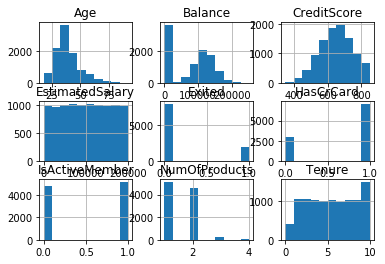

In [13]:
churn.hist()
plt.show()

We can see that the Age and creditscore attributes may have a Gaussian or nearly Gaussian distribution.
Which is interesting because most machine learning techniques assume a Gaussian univariate distribution on the input variables.

## Density Plot

Which is another way of getting a quick idea of the distriubtion of each of the numeric feature.

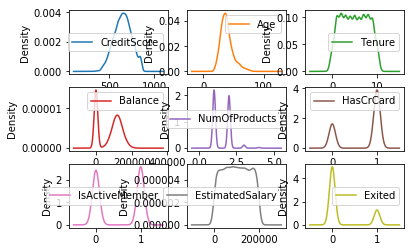

In [14]:
churn.plot(kind = 'density', subplots = True, 
           layout = (3,3), sharex = False)
plt.show()

From the plot above, we can see that the distribution for each of the numeric feature is clearer than the histograms above.

## Box and Whisker Plots

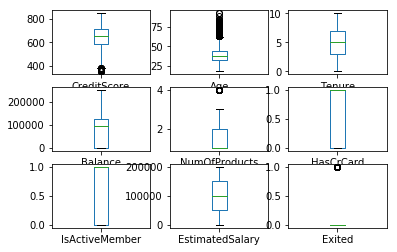

In [15]:
churn.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

The Boxplots summarize the distribution of each attribute, drawing a line for the median and a box which is around the 25th and 75th percentiles of
the churn data. The whiskers give an idea of the spread of the data and dots outside of the whiskers show the presence outlier that are 1.5 times greater than the size of spread of the data.

## plot correlation matrix

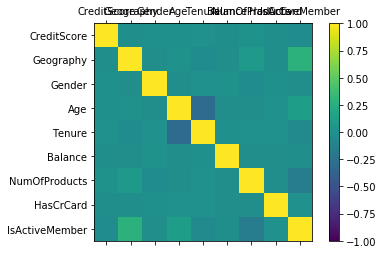

In [16]:
correlations = churn.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(churn.columns)
ax.set_yticklabels(churn.columns)
plt.show()

### Scatterplot Matrix

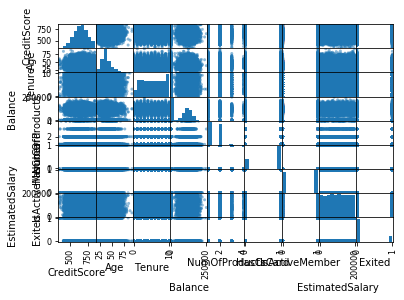

In [17]:
scatter_matrix(churn)
plt.show()

In [18]:
 churn['Exited'].value_counts(normalize = True)*100

0    79.63
1    20.37
Name: Exited, dtype: float64

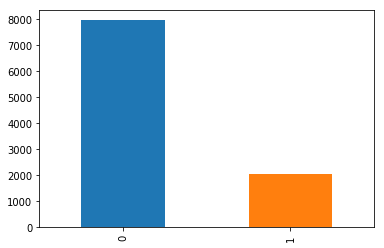

In [19]:
 churn['Exited'].value_counts().plot.bar()

In [59]:
churn.head(5) 

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [60]:
churn.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

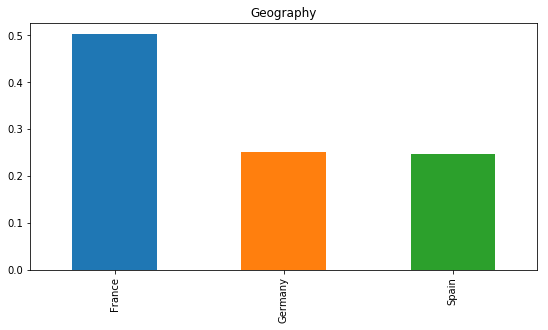

In [61]:
plt.figure(1) 
plt.subplot(221)
churn['Geography'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Geography') 
plt.show()

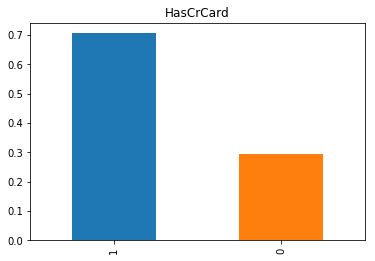

In [62]:
plt.figure(1) 
churn['HasCrCard'].value_counts(normalize=True).plot.bar(title= 'HasCrCard') 
plt.show()

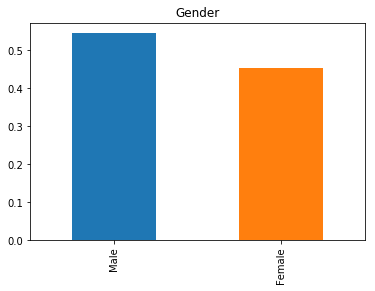

In [63]:
plt.figure(1) 
churn['Gender'].value_counts(normalize=True).plot.bar(title= 'Gender') 
plt.show()

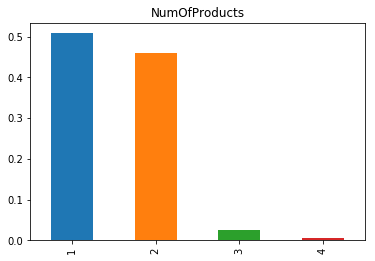

In [64]:
plt.figure(10)
churn['NumOfProducts'].value_counts(normalize=True).plot.bar(title= 'NumOfProducts') 
plt.show()

In [65]:
#CreditScore,Age,Balance,EstimatedSalary
import seaborn as sns

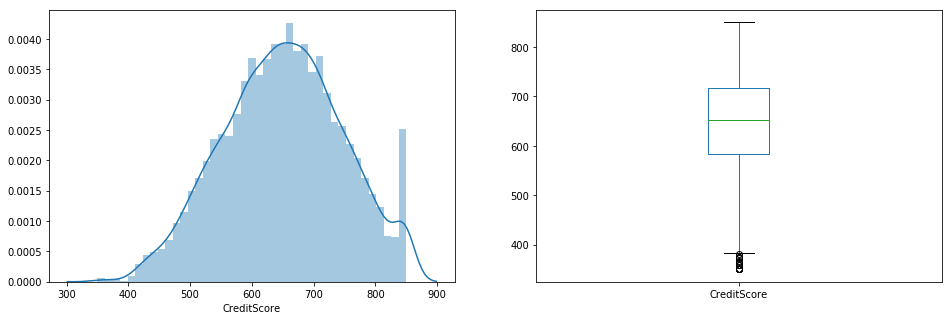

In [66]:
plt.figure(1) 
plt.subplot(121)
sns.distplot(churn['CreditScore']); 
plt.subplot(122)
churn['CreditScore'].plot.box(figsize=(16,5)) 
plt.show()

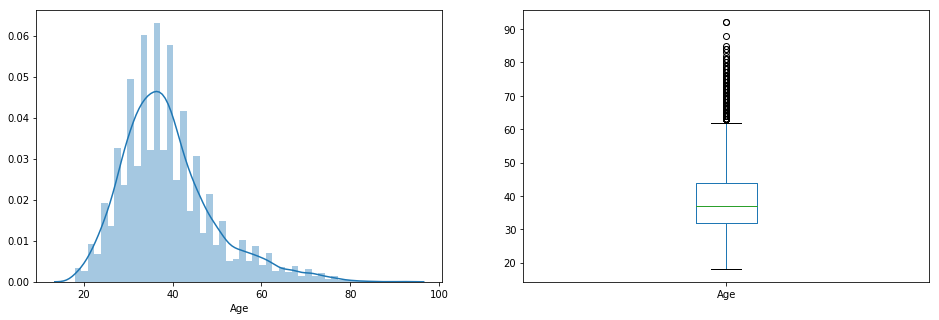

In [67]:
plt.figure(1) 
plt.subplot(121)
sns.distplot(churn['Age']); 
plt.subplot(122)
churn['Age'].plot.box(figsize=(16,5)) 
plt.show()

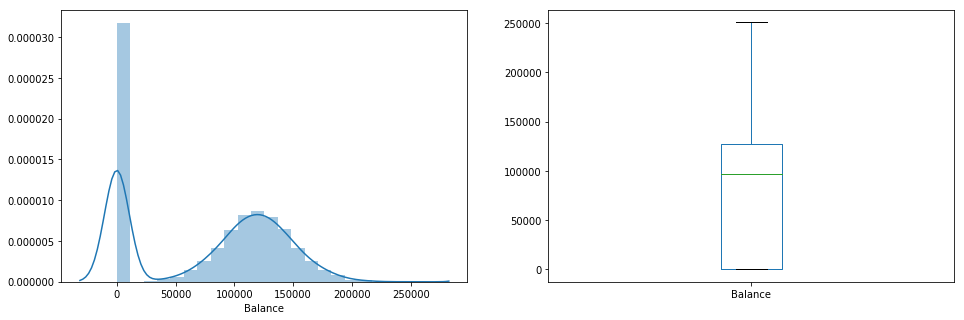

In [68]:
plt.figure(1) 
plt.subplot(121)
sns.distplot(churn['Balance']); 
plt.subplot(122)
churn['Balance'].plot.box(figsize=(16,5)) 
plt.show()

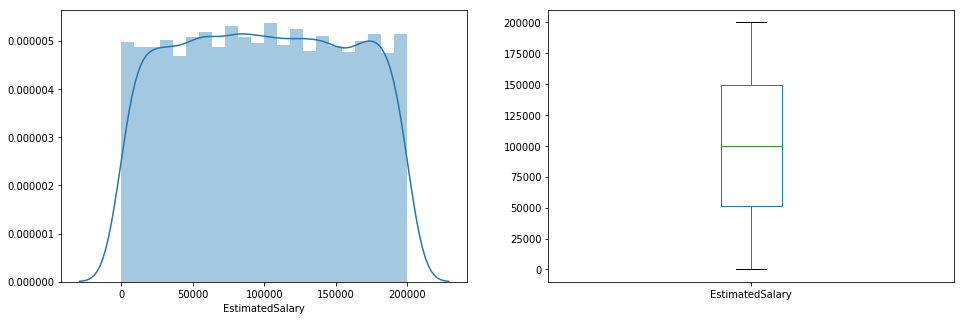

In [69]:
plt.figure(1) 
plt.subplot(121)
sns.distplot(churn['EstimatedSalary']); 
plt.subplot(122)
churn['EstimatedSalary'].plot.box(figsize=(16,5)) 
plt.show()

In [70]:
#BIVARIATE ANALYSIS

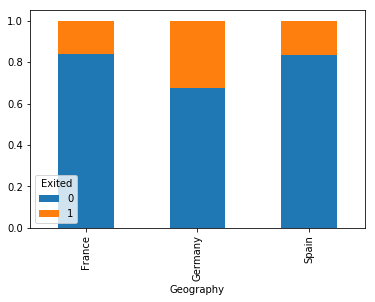

In [71]:
Geography=pd.crosstab(churn['Geography'],churn['Exited'])
Geography.div(Geography.sum(1).astype(float),
              axis=0).plot(kind="bar", stacked=True, figsize=(6,4))

In [72]:
churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


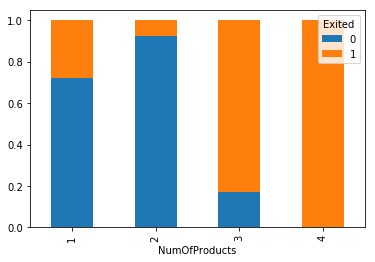

In [73]:

NumOfProducts=pd.crosstab(churn['NumOfProducts'],churn['Exited'])
NumOfProducts.div(NumOfProducts.sum(1).astype(float),
              axis=0).plot(kind="bar", stacked=True, figsize=(6,4))

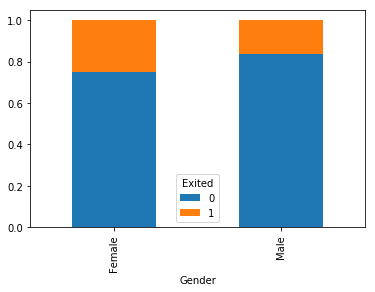

In [74]:
Gender=pd.crosstab(churn['Gender'],churn['Exited'])
Gender.div(Gender.sum(1).astype(float),
              axis=0).plot(kind="bar", stacked=True, figsize=(6,4))

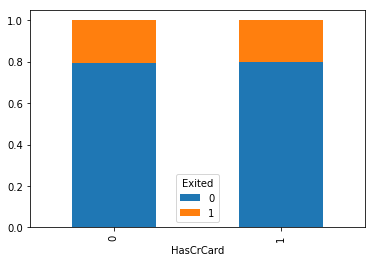

In [75]:
HasCrCard=pd.crosstab(churn['HasCrCard'],churn['Exited'])
HasCrCard.div(HasCrCard.sum(1).astype(float),
              axis=0).plot(kind="bar", stacked=True, figsize=(6,4))

In [76]:
X = churn.drop('Exited',axis=1)
y = churn.Exited
cate_features_index = np.where(X.dtypes != float)[0]

In [77]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X[['CreditScore','Age','Tenure','Balance','NumOfProducts',
                                  'EstimatedSalary']])
# summarize transformed data
set_printoptions(precision=3)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


### Standardize Data

In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X[['CreditScore','Age','Tenure','Balance','NumOfProducts',
                                  'EstimatedSalary']])
rescaledX = scaler.transform(X[['CreditScore','Age','Tenure','Balance','NumOfProducts',
                                  'EstimatedSalary']])

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [79]:
labelencoder = LabelEncoder()

X['Gender'] = labelencoder.fit_transform(X['Gender'].astype('str'))
X['Geography'] = labelencoder.fit_transform(X['Geography'].astype('str'))

In [80]:
#one hot encoding
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:]

#### Splitting the dataset into the Training set and Test set

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### Modeling(ANN)

In [82]:
# Importing the Keras libraries and packages

In [83]:
import keras # library for the ANN
from keras.models import Sequential #for initialization
from keras.layers import Dense # For adding layers to our networks
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [84]:
# First we Initialize the ANN

In [85]:
classifier = Sequential()# creation of an object of the sequence model

Since we will be using 4layers, two hidden layers, we
will start adding them 

#### The input and the first hidden layer will be added together here.

In [86]:

classifier.add(Dense(units = 6, kernel_initializer = 'uniform', 
                     activation = 'relu', input_dim = 11))

#### Adding the second hidden layer to our classifier

In [87]:
classifier.add(Dense(units = 6, kernel_initializer = 'uniform',
                     activation = 'relu'))

#### Addding the output layer to our network.

In [88]:
classifier.add(Dense(units = 1, kernel_initializer = 'uniform',
                     activation = 'sigmoid'))

#### Compiling the ANN

I am using adam optimizer based on best practices and the accuracy metric to evaluate my model.

In [89]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                   metrics = ['accuracy'])

#### Fitting the ANN to the Training set

In [90]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
7000/7000 [==============================] - 1s 207us/step - loss: 0.5844 - acc: 0.7917
Epoch 2/100
7000/7000 [==============================] - 1s 95us/step - loss: 0.5252 - acc: 0.7977
Epoch 3/100
7000/7000 [==============================] - 1s 97us/step - loss: 0.5164 - acc: 0.7977
Epoch 4/100
7000/7000 [==============================] - 1s 97us/step - loss: 0.5081 - acc: 0.7977
Epoch 5/100
7000/7000 [==============================] - 1s 97us/step - loss: 0.5072 - acc: 0.7977
Epoch 6/100
7000/7000 [==============================] - 1s 96us/step - loss: 0.5037 - acc: 0.7977
Epoch 7/100
7000/7000 [==============================] - 1s 96us/step - loss: 0.5023 - acc: 0.7977
Epoch 8/100
7000/7000 [==============================] - 1s 95us/step - loss: 0.5024 - acc: 0.7977
Epoch 9/100
7000/7000 [==============================] - 1s 93us/step - loss: 0.5013 - acc: 0.7977
Epoch 10/100
7000/7000 [==============================] - 1s 101us/step - loss: 0.4989 - acc: 0.7977
Epoch 1

7000/7000 [==============================] - 1s 104us/step - loss: 0.4952 - acc: 0.7977
Epoch 83/100
7000/7000 [==============================] - 1s 101us/step - loss: 0.4952 - acc: 0.7977
Epoch 84/100
7000/7000 [==============================] - 1s 100us/step - loss: 0.4951 - acc: 0.7977
Epoch 85/100
7000/7000 [==============================] - 1s 102us/step - loss: 0.4951 - acc: 0.7977
Epoch 86/100
7000/7000 [==============================] - 1s 100us/step - loss: 0.4952 - acc: 0.7977
Epoch 87/100
7000/7000 [==============================] - 1s 102us/step - loss: 0.4952 - acc: 0.7977
Epoch 88/100
7000/7000 [==============================] - 1s 101us/step - loss: 0.4951 - acc: 0.7977
Epoch 89/100
7000/7000 [==============================] - 1s 96us/step - loss: 0.4952 - acc: 0.7977
Epoch 90/100
7000/7000 [==============================] - 1s 101us/step - loss: 0.4952 - acc: 0.7977
Epoch 91/100
7000/7000 [==============================] - 1s 102us/step - loss: 0.4952 - acc: 0.7977
Epoc

#### Predicting the Test set results

In [91]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [92]:
from sklearn.metrics import recall_score,confusion_matrix,precision_score, f1_score,roc_auc_score, roc_curve

In [93]:
print('the test accuracy is :{:.5f}'.format(accuracy_score(y_test, y_pred)))

the test accuracy is :0.79300


#### Making the Confusion Matrix

In [94]:
com = confusion_matrix(y_test, y_pred)

In [95]:
# Part 4 - Evaluating, Improving and Tuning the ANN
# Evaluating the ANN
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, n_jobs = -1)
mean = accuracies.mean()
variance = accuracies.std()

In [101]:
accuracies, mean, variance
# Improving the ANN
# Dropout Regularization to reduce overfitting if needed
# Tuning the ANN

(array([0.793, 0.803, 0.78 , 0.817, 0.827, 0.781, 0.777, 0.799, 0.799,
        0.801]), 0.7977142822742462, 0.015202039995675617)

In [97]:
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [16, 64, 32],
              'epochs': [50, 80, 100],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

Epoch 1/50
6300/6300 [==============================] - 1s 190us/step - loss: 0.6767 - acc: 0.7860
Epoch 2/50
6300/6300 [==============================] - 0s 61us/step - loss: 0.5835 - acc: 0.7983
Epoch 3/50
6300/6300 [==============================] - 0s 57us/step - loss: 0.5435 - acc: 0.7983
Epoch 4/50
6300/6300 [==============================] - 0s 58us/step - loss: 0.5220 - acc: 0.7983
Epoch 5/50
6300/6300 [==============================] - 0s 60us/step - loss: 0.5113 - acc: 0.7983
Epoch 6/50
6300/6300 [==============================] - 0s 62us/step - loss: 0.5063 - acc: 0.7983
Epoch 7/50
6300/6300 [==============================] - 0s 58us/step - loss: 0.5042 - acc: 0.7983
Epoch 8/50
6300/6300 [==============================] - 0s 62us/step - loss: 0.5033 - acc: 0.7983
Epoch 9/50
6300/6300 [==============================] - 0s 63us/step - loss: 0.5030 - acc: 0.7983
Epoch 10/50
6300/6300 [==============================] - 0s 62us/step - loss: 0.5029 - acc: 0.7983
Epoch 11/50
6300/6

6300/6300 [==============================] - 0s 64us/step - loss: 0.5017 - acc: 0.7956
Epoch 17/50
6300/6300 [==============================] - 0s 66us/step - loss: 0.5052 - acc: 0.7956
Epoch 18/50
6300/6300 [==============================] - 0s 64us/step - loss: 0.5021 - acc: 0.7956
Epoch 19/50
6300/6300 [==============================] - 0s 64us/step - loss: 0.5004 - acc: 0.7956
Epoch 20/50
6300/6300 [==============================] - 0s 65us/step - loss: 0.5019 - acc: 0.7956
Epoch 21/50
6300/6300 [==============================] - 0s 64us/step - loss: 0.5054 - acc: 0.7956
Epoch 22/50
6300/6300 [==============================] - 0s 63us/step - loss: 0.5006 - acc: 0.7956
Epoch 23/50
6300/6300 [==============================] - 0s 64us/step - loss: 0.5018 - acc: 0.7956
Epoch 24/50
6300/6300 [==============================] - 0s 63us/step - loss: 0.5009 - acc: 0.7956
Epoch 25/50
6300/6300 [==============================] - 0s 64us/step - loss: 0.5022 - acc: 0.7956
Epoch 26/50
6300/6300 

Epoch 49/50
6300/6300 [==============================] - 0s 66us/step - loss: 0.5063 - acc: 0.7944
Epoch 50/50
6300/6300 [==============================] - 0s 72us/step - loss: 0.5007 - acc: 0.7944
Epoch 1/50
6300/6300 [==============================] - 1s 220us/step - loss: 0.6412 - acc: 0.7883
Epoch 2/50
6300/6300 [==============================] - 0s 66us/step - loss: 0.5272 - acc: 0.7995
Epoch 3/50
6300/6300 [==============================] - 0s 62us/step - loss: 0.5248 - acc: 0.7995
Epoch 4/50
6300/6300 [==============================] - 0s 66us/step - loss: 0.5160 - acc: 0.7995
Epoch 5/50
6300/6300 [==============================] - 0s 63us/step - loss: 0.5108 - acc: 0.7995
Epoch 6/50
6300/6300 [==============================] - 0s 64us/step - loss: 0.5087 - acc: 0.7995
Epoch 7/50
6300/6300 [==============================] - 0s 63us/step - loss: 0.5060 - acc: 0.7995
Epoch 8/50
6300/6300 [==============================] - 0s 64us/step - loss: 0.5017 - acc: 0.7995
Epoch 9/50
6300/6

6300/6300 [==============================] - 0s 68us/step - loss: 0.4979 - acc: 0.7976
Epoch 15/50
6300/6300 [==============================] - 0s 72us/step - loss: 0.4987 - acc: 0.7976
Epoch 16/50
6300/6300 [==============================] - 0s 68us/step - loss: 0.4985 - acc: 0.7976
Epoch 17/50
6300/6300 [==============================] - 0s 67us/step - loss: 0.4983 - acc: 0.7976
Epoch 18/50
6300/6300 [==============================] - 0s 71us/step - loss: 0.4981 - acc: 0.7976
Epoch 19/50
6300/6300 [==============================] - 0s 69us/step - loss: 0.4976 - acc: 0.7976
Epoch 20/50
6300/6300 [==============================] - 0s 67us/step - loss: 0.4980 - acc: 0.7976
Epoch 21/50
6300/6300 [==============================] - 0s 68us/step - loss: 0.4979 - acc: 0.7976
Epoch 22/50
6300/6300 [==============================] - 0s 69us/step - loss: 0.4969 - acc: 0.7976
Epoch 23/50
6300/6300 [==============================] - 0s 71us/step - loss: 0.4976 - acc: 0.7976
Epoch 24/50
6300/6300 

Epoch 47/50
6300/6300 [==============================] - 0s 65us/step - loss: 0.4969 - acc: 0.7973
Epoch 48/50
6300/6300 [==============================] - 0s 72us/step - loss: 0.4968 - acc: 0.7973
Epoch 49/50
6300/6300 [==============================] - 0s 68us/step - loss: 0.4970 - acc: 0.7973
Epoch 50/50
6300/6300 [==============================] - 0s 69us/step - loss: 0.4966 - acc: 0.7973
Epoch 1/50
6300/6300 [==============================] - 2s 253us/step - loss: 0.5947 - acc: 0.7898
Epoch 2/50
6300/6300 [==============================] - 0s 64us/step - loss: 0.5233 - acc: 0.7975
Epoch 3/50
6300/6300 [==============================] - 0s 58us/step - loss: 0.5182 - acc: 0.7963
Epoch 4/50
6300/6300 [==============================] - 0s 62us/step - loss: 0.5118 - acc: 0.7983
Epoch 5/50
6300/6300 [==============================] - 0s 55us/step - loss: 0.5067 - acc: 0.7983
Epoch 6/50
6300/6300 [==============================] - 0s 55us/step - loss: 0.5056 - acc: 0.7983
Epoch 7/50
6300

6300/6300 [==============================] - 0s 67us/step - loss: 0.5084 - acc: 0.7956
Epoch 12/50
6300/6300 [==============================] - 0s 64us/step - loss: 0.5077 - acc: 0.7956
Epoch 13/50
6300/6300 [==============================] - 0s 63us/step - loss: 0.5074 - acc: 0.7956
Epoch 14/50
6300/6300 [==============================] - 0s 64us/step - loss: 0.5071 - acc: 0.7956
Epoch 15/50
6300/6300 [==============================] - 0s 65us/step - loss: 0.5066 - acc: 0.7956
Epoch 16/50
6300/6300 [==============================] - 0s 63us/step - loss: 0.5047 - acc: 0.7956
Epoch 17/50
6300/6300 [==============================] - 0s 62us/step - loss: 0.5036 - acc: 0.7956
Epoch 18/50
6300/6300 [==============================] - 0s 66us/step - loss: 0.5050 - acc: 0.7956
Epoch 19/50
6300/6300 [==============================] - 0s 64us/step - loss: 0.5033 - acc: 0.7956
Epoch 20/50
6300/6300 [==============================] - 0s 68us/step - loss: 0.5041 - acc: 0.7956
Epoch 21/50
6300/6300 

Epoch 44/50
6300/6300 [==============================] - 0s 71us/step - loss: 3.3132 - acc: 0.7944
Epoch 45/50
6300/6300 [==============================] - 0s 69us/step - loss: 3.3132 - acc: 0.7944
Epoch 46/50
6300/6300 [==============================] - 0s 71us/step - loss: 3.3132 - acc: 0.7944
Epoch 47/50
6300/6300 [==============================] - 0s 69us/step - loss: 3.3132 - acc: 0.7944
Epoch 48/50
6300/6300 [==============================] - ETA: 0s - loss: 3.3639 - acc: 0.791 - 0s 67us/step - loss: 3.3132 - acc: 0.7944
Epoch 49/50
6300/6300 [==============================] - 0s 68us/step - loss: 3.3132 - acc: 0.7944
Epoch 50/50
6300/6300 [==============================] - 0s 72us/step - loss: 3.3132 - acc: 0.7944
Epoch 1/50
6300/6300 [==============================] - 2s 279us/step - loss: 0.5521 - acc: 0.7903
Epoch 2/50
6300/6300 [==============================] - 0s 64us/step - loss: 0.5210 - acc: 0.7995
Epoch 3/50
6300/6300 [==============================] - 0s 67us/step - l

6300/6300 [==============================] - 0s 75us/step - loss: 3.5917 - acc: 0.7471
Epoch 10/50
6300/6300 [==============================] - 0s 69us/step - loss: 3.7979 - acc: 0.7478
Epoch 11/50
6300/6300 [==============================] - 0s 71us/step - loss: 4.1316 - acc: 0.7279
Epoch 12/50
6300/6300 [==============================] - 0s 74us/step - loss: 4.4698 - acc: 0.6819
Epoch 13/50
6300/6300 [==============================] - 0s 73us/step - loss: 2.8799 - acc: 0.7694
Epoch 14/50
6300/6300 [==============================] - 0s 72us/step - loss: 0.9367 - acc: 0.7792
Epoch 15/50
6300/6300 [==============================] - 0s 66us/step - loss: 0.5289 - acc: 0.7976
Epoch 16/50
6300/6300 [==============================] - 0s 67us/step - loss: 0.5254 - acc: 0.7976
Epoch 17/50
6300/6300 [==============================] - 0s 77us/step - loss: 0.5130 - acc: 0.7976
Epoch 18/50
6300/6300 [==============================] - 0s 72us/step - loss: 0.5078 - acc: 0.7976
Epoch 19/50
6300/6300 

Epoch 42/50
6300/6300 [==============================] - 0s 74us/step - loss: 0.4986 - acc: 0.7973
Epoch 43/50
6300/6300 [==============================] - 0s 73us/step - loss: 0.4996 - acc: 0.7973
Epoch 44/50
6300/6300 [==============================] - 0s 74us/step - loss: 0.4993 - acc: 0.7973
Epoch 45/50
6300/6300 [==============================] - 0s 73us/step - loss: 0.4983 - acc: 0.7973
Epoch 46/50
6300/6300 [==============================] - 0s 72us/step - loss: 0.4990 - acc: 0.7973
Epoch 47/50
6300/6300 [==============================] - 0s 73us/step - loss: 0.4974 - acc: 0.7973
Epoch 48/50
6300/6300 [==============================] - 0s 74us/step - loss: 0.4981 - acc: 0.7973
Epoch 49/50
6300/6300 [==============================] - 0s 74us/step - loss: 0.4992 - acc: 0.7973
Epoch 50/50
6300/6300 [==============================] - 0s 72us/step - loss: 0.4996 - acc: 0.7973
Epoch 1/80
6300/6300 [==============================] - 2s 312us/step - loss: 0.6094 - acc: 0.7813
Epoch 2/80

Epoch 77/80
6300/6300 [==============================] - 0s 77us/step - loss: 0.4975 - acc: 0.7971
Epoch 78/80
6300/6300 [==============================] - 0s 78us/step - loss: 0.4973 - acc: 0.7971
Epoch 79/80
6300/6300 [==============================] - 0s 77us/step - loss: 0.4974 - acc: 0.7971
Epoch 80/80
6300/6300 [==============================] - 0s 77us/step - loss: 0.4976 - acc: 0.7971
Epoch 1/80
6300/6300 [==============================] - 2s 331us/step - loss: 0.5813 - acc: 0.7894
Epoch 2/80
6300/6300 [==============================] - 0s 64us/step - loss: 0.5179 - acc: 0.7997
Epoch 3/80
6300/6300 [==============================] - 0s 76us/step - loss: 0.5136 - acc: 0.7997
Epoch 4/80
6300/6300 [==============================] - 0s 72us/step - loss: 0.5091 - acc: 0.7997
Epoch 5/80
6300/6300 [==============================] - 1s 80us/step - loss: 0.5025 - acc: 0.7997
Epoch 6/80
6300/6300 [==============================] - 1s 82us/step - loss: 0.5023 - acc: 0.7997
Epoch 7/80
6300

6300/6300 [==============================] - 2s 339us/step - loss: 0.5561 - acc: 0.7859
Epoch 2/80
6300/6300 [==============================] - 0s 68us/step - loss: 0.5263 - acc: 0.7932
Epoch 3/80
6300/6300 [==============================] - 0s 69us/step - loss: 0.5224 - acc: 0.7944
Epoch 4/80
6300/6300 [==============================] - 0s 69us/step - loss: 0.5112 - acc: 0.7944
Epoch 5/80
6300/6300 [==============================] - 0s 68us/step - loss: 0.5136 - acc: 0.7944
Epoch 6/80
6300/6300 [==============================] - 0s 69us/step - loss: 0.5096 - acc: 0.7944
Epoch 7/80
6300/6300 [==============================] - 0s 71us/step - loss: 0.5111 - acc: 0.7944
Epoch 8/80
6300/6300 [==============================] - 0s 67us/step - loss: 0.5086 - acc: 0.7944
Epoch 9/80
6300/6300 [==============================] - 0s 71us/step - loss: 0.5073 - acc: 0.7944
Epoch 10/80
6300/6300 [==============================] - 0s 69us/step - loss: 0.5053 - acc: 0.7944
Epoch 11/80
6300/6300 [======

Epoch 4/80
6300/6300 [==============================] - 0s 67us/step - loss: 0.5114 - acc: 0.7995
Epoch 5/80
6300/6300 [==============================] - 0s 69us/step - loss: 0.5050 - acc: 0.7995
Epoch 6/80
6300/6300 [==============================] - 1s 81us/step - loss: 0.5068 - acc: 0.7995
Epoch 7/80
6300/6300 [==============================] - 0s 77us/step - loss: 0.5043 - acc: 0.7995
Epoch 8/80
6300/6300 [==============================] - 1s 81us/step - loss: 0.5047 - acc: 0.7995
Epoch 9/80
6300/6300 [==============================] - 0s 79us/step - loss: 0.5011 - acc: 0.7995
Epoch 10/80
6300/6300 [==============================] - 1s 81us/step - loss: 0.5023 - acc: 0.7995
Epoch 11/80
6300/6300 [==============================] - 0s 79us/step - loss: 0.5036 - acc: 0.7995
Epoch 12/80
6300/6300 [==============================] - 0s 78us/step - loss: 0.5018 - acc: 0.7995
Epoch 13/80
6300/6300 [==============================] - 1s 82us/step - loss: 0.4999 - acc: 0.7995
Epoch 14/80
6300

Epoch 9/80
6300/6300 [==============================] - 0s 79us/step - loss: 0.5017 - acc: 0.7976
Epoch 10/80
6300/6300 [==============================] - 0s 78us/step - loss: 0.5009 - acc: 0.7976
Epoch 11/80
6300/6300 [==============================] - 0s 79us/step - loss: 0.5006 - acc: 0.7976
Epoch 12/80
6300/6300 [==============================] - 0s 78us/step - loss: 0.5000 - acc: 0.7976
Epoch 13/80
6300/6300 [==============================] - 0s 79us/step - loss: 0.5019 - acc: 0.7976
Epoch 14/80
6300/6300 [==============================] - 0s 78us/step - loss: 0.4989 - acc: 0.7976
Epoch 15/80
6300/6300 [==============================] - 0s 79us/step - loss: 0.4979 - acc: 0.7976
Epoch 16/80
6300/6300 [==============================] - 0s 76us/step - loss: 0.4982 - acc: 0.7976
Epoch 17/80
6300/6300 [==============================] - 1s 82us/step - loss: 0.4971 - acc: 0.7976
Epoch 18/80
6300/6300 [==============================] - 0s 78us/step - loss: 0.4970 - acc: 0.7976
Epoch 19/80

6300/6300 [==============================] - 0s 78us/step - loss: 0.4999 - acc: 0.7973
Epoch 14/80
6300/6300 [==============================] - 0s 77us/step - loss: 0.4987 - acc: 0.7973
Epoch 15/80
6300/6300 [==============================] - 0s 73us/step - loss: 0.4989 - acc: 0.7973
Epoch 16/80
6300/6300 [==============================] - 0s 79us/step - loss: 0.4971 - acc: 0.7973
Epoch 17/80
6300/6300 [==============================] - 0s 78us/step - loss: 0.4964 - acc: 0.7973
Epoch 18/80
6300/6300 [==============================] - 0s 77us/step - loss: 0.4979 - acc: 0.7973
Epoch 19/80
6300/6300 [==============================] - 0s 76us/step - loss: 0.4975 - acc: 0.7973
Epoch 20/80
6300/6300 [==============================] - 0s 77us/step - loss: 0.4972 - acc: 0.7973
Epoch 21/80
6300/6300 [==============================] - 0s 78us/step - loss: 0.4976 - acc: 0.7973
Epoch 22/80
6300/6300 [==============================] - 0s 74us/step - loss: 0.4967 - acc: 0.7973
Epoch 23/80
6300/6300 

Epoch 16/80
6300/6300 [==============================] - 0s 66us/step - loss: 0.5016 - acc: 0.7983
Epoch 17/80
6300/6300 [==============================] - 0s 67us/step - loss: 0.5015 - acc: 0.7983
Epoch 18/80
6300/6300 [==============================] - 0s 68us/step - loss: 0.4999 - acc: 0.7983
Epoch 19/80
6300/6300 [==============================] - 0s 72us/step - loss: 0.4977 - acc: 0.7983
Epoch 20/80
6300/6300 [==============================] - 0s 67us/step - loss: 0.4982 - acc: 0.7983
Epoch 21/80
6300/6300 [==============================] - 1s 83us/step - loss: 0.5024 - acc: 0.7968
Epoch 22/80
6300/6300 [==============================] - 1s 82us/step - loss: 0.8898 - acc: 0.7489
Epoch 23/80
6300/6300 [==============================] - 1s 82us/step - loss: 2.5436 - acc: 0.7405
Epoch 24/80
6300/6300 [==============================] - 1s 84us/step - loss: 3.2435 - acc: 0.7287
Epoch 25/80
6300/6300 [==============================] - 1s 80us/step - loss: 3.2384 - acc: 0.7430
Epoch 26/8

Epoch 21/80
6300/6300 [==============================] - 0s 79us/step - loss: 0.4985 - acc: 0.7997
Epoch 22/80
6300/6300 [==============================] - 1s 81us/step - loss: 0.4977 - acc: 0.7997
Epoch 23/80
6300/6300 [==============================] - 0s 79us/step - loss: 0.4969 - acc: 0.7997
Epoch 24/80
6300/6300 [==============================] - 1s 84us/step - loss: 0.4978 - acc: 0.7997
Epoch 25/80
6300/6300 [==============================] - 0s 79us/step - loss: 0.4982 - acc: 0.7997
Epoch 26/80
6300/6300 [==============================] - 1s 81us/step - loss: 0.4957 - acc: 0.7997
Epoch 27/80
6300/6300 [==============================] - 1s 82us/step - loss: 0.4965 - acc: 0.7997
Epoch 28/80
6300/6300 [==============================] - 1s 81us/step - loss: 0.4963 - acc: 0.7997
Epoch 29/80
6300/6300 [==============================] - 0s 79us/step - loss: 0.4960 - acc: 0.7997
Epoch 30/80
6300/6300 [==============================] - 1s 81us/step - loss: 0.4963 - acc: 0.7997
Epoch 31/8

Epoch 26/80
6300/6300 [==============================] - 1s 81us/step - loss: 3.2103 - acc: 0.7173
Epoch 27/80
6300/6300 [==============================] - 1s 84us/step - loss: 3.4650 - acc: 0.7368
Epoch 28/80
6300/6300 [==============================] - 1s 84us/step - loss: 3.9816 - acc: 0.7073
Epoch 29/80
6300/6300 [==============================] - 1s 82us/step - loss: 4.1182 - acc: 0.7054
Epoch 30/80
6300/6300 [==============================] - 1s 83us/step - loss: 4.5985 - acc: 0.6759
Epoch 31/80
6300/6300 [==============================] - 1s 82us/step - loss: 4.1183 - acc: 0.7019
Epoch 32/80
6300/6300 [==============================] - 1s 86us/step - loss: 3.4871 - acc: 0.7283
Epoch 33/80
6300/6300 [==============================] - 1s 82us/step - loss: 3.1252 - acc: 0.7395
Epoch 34/80
6300/6300 [==============================] - 1s 83us/step - loss: 2.5699 - acc: 0.7511
Epoch 35/80
6300/6300 [==============================] - 1s 82us/step - loss: 2.8630 - acc: 0.7275
Epoch 36/8

Epoch 31/80
6300/6300 [==============================] - 1s 87us/step - loss: 4.1145 - acc: 0.7014
Epoch 32/80
6300/6300 [==============================] - 1s 86us/step - loss: 4.1310 - acc: 0.6992
Epoch 33/80
6300/6300 [==============================] - 1s 84us/step - loss: 2.8163 - acc: 0.7830
Epoch 34/80
6300/6300 [==============================] - 1s 88us/step - loss: 2.6959 - acc: 0.7894
Epoch 35/80
6300/6300 [==============================] - 1s 87us/step - loss: 5.6887 - acc: 0.6017
Epoch 36/80
6300/6300 [==============================] - 1s 88us/step - loss: 2.8586 - acc: 0.7798
Epoch 37/80
6300/6300 [==============================] - 1s 87us/step - loss: 7.7125 - acc: 0.4710
Epoch 38/80
6300/6300 [==============================] - 1s 87us/step - loss: 5.4562 - acc: 0.6162
Epoch 39/80
6300/6300 [==============================] - 1s 88us/step - loss: 4.8904 - acc: 0.6538
Epoch 40/80
6300/6300 [==============================] - 1s 87us/step - loss: 4.0055 - acc: 0.7076
Epoch 41/8

Epoch 36/80
6300/6300 [==============================] - 1s 91us/step - loss: 0.5037 - acc: 0.7976
Epoch 37/80
6300/6300 [==============================] - 1s 87us/step - loss: 0.5037 - acc: 0.7976: 0s - loss: 0.5108 - acc: 0.7
Epoch 38/80
6300/6300 [==============================] - 1s 88us/step - loss: 0.5037 - acc: 0.7976
Epoch 39/80
6300/6300 [==============================] - 1s 91us/step - loss: 0.5037 - acc: 0.7976
Epoch 40/80
6300/6300 [==============================] - 1s 89us/step - loss: 0.5037 - acc: 0.7976
Epoch 41/80
6300/6300 [==============================] - 1s 88us/step - loss: 0.5037 - acc: 0.7976
Epoch 42/80
6300/6300 [==============================] - 1s 87us/step - loss: 0.5037 - acc: 0.7976
Epoch 43/80
6300/6300 [==============================] - 1s 91us/step - loss: 0.5037 - acc: 0.7976
Epoch 44/80
6300/6300 [==============================] - 1s 89us/step - loss: 0.5037 - acc: 0.7976
Epoch 45/80
6300/6300 [==============================] - 1s 88us/step - loss: 0

6300/6300 [==============================] - 1s 92us/step - loss: 0.4954 - acc: 0.7983
Epoch 41/100
6300/6300 [==============================] - 1s 90us/step - loss: 0.4944 - acc: 0.7983
Epoch 42/100
6300/6300 [==============================] - 1s 88us/step - loss: 0.4993 - acc: 0.7983
Epoch 43/100
6300/6300 [==============================] - 1s 89us/step - loss: 0.5013 - acc: 0.7983
Epoch 44/100
6300/6300 [==============================] - 1s 88us/step - loss: 0.5008 - acc: 0.7983
Epoch 45/100
6300/6300 [==============================] - 1s 87us/step - loss: 0.5013 - acc: 0.7983
Epoch 46/100
6300/6300 [==============================] - 1s 88us/step - loss: 0.4957 - acc: 0.7983
Epoch 47/100
6300/6300 [==============================] - 1s 89us/step - loss: 0.4966 - acc: 0.7983
Epoch 48/100
6300/6300 [==============================] - 1s 90us/step - loss: 0.5028 - acc: 0.7983
Epoch 49/100
6300/6300 [==============================] - 1s 87us/step - loss: 0.5019 - acc: 0.7983
Epoch 50/100


6300/6300 [==============================] - 1s 89us/step - loss: 0.4980 - acc: 0.7971
Epoch 23/100
6300/6300 [==============================] - 1s 87us/step - loss: 0.4997 - acc: 0.7971
Epoch 24/100
6300/6300 [==============================] - 1s 88us/step - loss: 0.4976 - acc: 0.7971
Epoch 25/100
6300/6300 [==============================] - 1s 87us/step - loss: 0.4986 - acc: 0.7971
Epoch 26/100
6300/6300 [==============================] - 1s 89us/step - loss: 0.4978 - acc: 0.7971
Epoch 27/100
6300/6300 [==============================] - 1s 88us/step - loss: 0.4988 - acc: 0.7971
Epoch 28/100
6300/6300 [==============================] - 1s 87us/step - loss: 0.4980 - acc: 0.7971
Epoch 29/100
6300/6300 [==============================] - 1s 89us/step - loss: 0.4987 - acc: 0.7971
Epoch 30/100
6300/6300 [==============================] - 1s 87us/step - loss: 0.4989 - acc: 0.7971
Epoch 31/100
6300/6300 [==============================] - 1s 85us/step - loss: 0.4986 - acc: 0.7971
Epoch 32/100


6300/6300 [==============================] - 1s 87us/step - loss: 0.4999 - acc: 0.7997
Epoch 85/100
6300/6300 [==============================] - 1s 91us/step - loss: 0.5000 - acc: 0.7997
Epoch 86/100
6300/6300 [==============================] - 1s 87us/step - loss: 0.5001 - acc: 0.7997
Epoch 87/100
6300/6300 [==============================] - 1s 88us/step - loss: 0.5002 - acc: 0.7997
Epoch 88/100
6300/6300 [==============================] - 1s 91us/step - loss: 0.5000 - acc: 0.7997
Epoch 89/100
6300/6300 [==============================] - 1s 87us/step - loss: 0.5001 - acc: 0.7997
Epoch 90/100
6300/6300 [==============================] - 1s 88us/step - loss: 0.5001 - acc: 0.7997
Epoch 91/100
6300/6300 [==============================] - 1s 87us/step - loss: 0.5001 - acc: 0.7997
Epoch 92/100
6300/6300 [==============================] - 1s 91us/step - loss: 0.5000 - acc: 0.7997
Epoch 93/100
6300/6300 [==============================] - 1s 89us/step - loss: 0.5000 - acc: 0.7997
Epoch 94/100


6300/6300 [==============================] - 1s 89us/step - loss: 0.5010 - acc: 0.7944
Epoch 48/100
6300/6300 [==============================] - 1s 91us/step - loss: 0.5007 - acc: 0.7944
Epoch 49/100
6300/6300 [==============================] - 1s 89us/step - loss: 0.5009 - acc: 0.7944
Epoch 50/100
6300/6300 [==============================] - 1s 91us/step - loss: 0.5007 - acc: 0.7944
Epoch 51/100
6300/6300 [==============================] - 1s 92us/step - loss: 0.5003 - acc: 0.7944
Epoch 52/100
6300/6300 [==============================] - 1s 88us/step - loss: 0.5009 - acc: 0.7944
Epoch 53/100
6300/6300 [==============================] - 1s 91us/step - loss: 0.5008 - acc: 0.7944
Epoch 54/100
6300/6300 [==============================] - 1s 89us/step - loss: 0.5012 - acc: 0.7944
Epoch 55/100
6300/6300 [==============================] - 1s 91us/step - loss: 0.5001 - acc: 0.7944
Epoch 56/100
6300/6300 [==============================] - 1s 89us/step - loss: 0.5005 - acc: 0.7944
Epoch 57/100


6300/6300 [==============================] - 1s 93us/step - loss: 0.5000 - acc: 0.8000
Epoch 11/100
6300/6300 [==============================] - 1s 94us/step - loss: 0.4970 - acc: 0.8000
Epoch 12/100
6300/6300 [==============================] - 1s 92us/step - loss: 0.4970 - acc: 0.8000
Epoch 13/100
6300/6300 [==============================] - 1s 94us/step - loss: 0.4958 - acc: 0.8000
Epoch 14/100
6300/6300 [==============================] - 1s 94us/step - loss: 0.4958 - acc: 0.8000
Epoch 15/100
6300/6300 [==============================] - 1s 92us/step - loss: 0.4955 - acc: 0.8000
Epoch 16/100
6300/6300 [==============================] - 1s 97us/step - loss: 0.4942 - acc: 0.8000
Epoch 17/100
6300/6300 [==============================] - 1s 92us/step - loss: 0.4944 - acc: 0.8000
Epoch 18/100
6300/6300 [==============================] - 1s 91us/step - loss: 0.4947 - acc: 0.8000
Epoch 19/100
6300/6300 [==============================] - 1s 94us/step - loss: 0.4946 - acc: 0.8000
Epoch 20/100


6300/6300 [==============================] - 1s 102us/step - loss: 0.4971 - acc: 0.7976
Epoch 72/100
6300/6300 [==============================] - 1s 103us/step - loss: 0.4959 - acc: 0.7976
Epoch 73/100
6300/6300 [==============================] - 1s 99us/step - loss: 0.4956 - acc: 0.7976
Epoch 74/100
6300/6300 [==============================] - 1s 118us/step - loss: 0.4954 - acc: 0.7976
Epoch 75/100
6300/6300 [==============================] - 1s 126us/step - loss: 0.4946 - acc: 0.7976
Epoch 76/100
6300/6300 [==============================] - 1s 102us/step - loss: 0.4959 - acc: 0.7976
Epoch 77/100
6300/6300 [==============================] - 1s 117us/step - loss: 0.4960 - acc: 0.7976
Epoch 78/100
6300/6300 [==============================] - 1s 120us/step - loss: 0.4954 - acc: 0.7976
Epoch 79/100
6300/6300 [==============================] - 1s 133us/step - loss: 0.4958 - acc: 0.7976
Epoch 80/100
6300/6300 [==============================] - 1s 161us/step - loss: 0.4954 - acc: 0.7976
Epoc

6300/6300 [==============================] - 1s 105us/step - loss: 0.4972 - acc: 0.7973
Epoch 34/100
6300/6300 [==============================] - 1s 126us/step - loss: 0.4976 - acc: 0.7973
Epoch 35/100
6300/6300 [==============================] - 1s 180us/step - loss: 0.4976 - acc: 0.7973
Epoch 36/100
6300/6300 [==============================] - 1s 165us/step - loss: 0.4960 - acc: 0.7973
Epoch 37/100
6300/6300 [==============================] - 1s 117us/step - loss: 0.4969 - acc: 0.7973
Epoch 38/100
6300/6300 [==============================] - 1s 106us/step - loss: 0.4971 - acc: 0.7973
Epoch 39/100
6300/6300 [==============================] - 1s 106us/step - loss: 0.4959 - acc: 0.7973
Epoch 40/100
6300/6300 [==============================] - 1s 105us/step - loss: 0.4965 - acc: 0.7973
Epoch 41/100
6300/6300 [==============================] - 1s 104us/step - loss: 0.4977 - acc: 0.7973
Epoch 42/100
6300/6300 [==============================] - 1s 107us/step - loss: 0.4973 - acc: 0.7973
Epo

Epoch 96/100
6300/6300 [==============================] - 1s 93us/step - loss: 0.4946 - acc: 0.7983
Epoch 97/100
6300/6300 [==============================] - 1s 111us/step - loss: 0.4945 - acc: 0.7983
Epoch 98/100
6300/6300 [==============================] - 1s 100us/step - loss: 0.4955 - acc: 0.7983
Epoch 99/100
6300/6300 [==============================] - 1s 106us/step - loss: 0.4953 - acc: 0.7983
Epoch 100/100
6300/6300 [==============================] - 1s 100us/step - loss: 0.4953 - acc: 0.7983
Epoch 1/100
6300/6300 [==============================] - 4s 566us/step - loss: 0.5502 - acc: 0.7938
Epoch 2/100
6300/6300 [==============================] - 1s 96us/step - loss: 0.5266 - acc: 0.7971
Epoch 3/100
6300/6300 [==============================] - 1s 95us/step - loss: 0.5241 - acc: 0.7968
Epoch 4/100
6300/6300 [==============================] - 1s 95us/step - loss: 0.5376 - acc: 0.7837
Epoch 5/100
6300/6300 [==============================] - 1s 97us/step - loss: 1.8591 - acc: 0.7227

6300/6300 [==============================] - 1s 99us/step - loss: 0.4956 - acc: 0.7997
Epoch 59/100
6300/6300 [==============================] - 1s 101us/step - loss: 0.4944 - acc: 0.7997
Epoch 60/100
6300/6300 [==============================] - 1s 98us/step - loss: 0.4955 - acc: 0.7997
Epoch 61/100
6300/6300 [==============================] - 1s 102us/step - loss: 0.4962 - acc: 0.7997
Epoch 62/100
6300/6300 [==============================] - 1s 93us/step - loss: 0.4955 - acc: 0.7997
Epoch 63/100
6300/6300 [==============================] - 1s 99us/step - loss: 0.4952 - acc: 0.7997
Epoch 64/100
6300/6300 [==============================] - 1s 99us/step - loss: 0.4945 - acc: 0.7997
Epoch 65/100
6300/6300 [==============================] - 1s 99us/step - loss: 0.4944 - acc: 0.7997
Epoch 66/100
6300/6300 [==============================] - 1s 102us/step - loss: 0.4943 - acc: 0.7997
Epoch 67/100
6300/6300 [==============================] - 1s 100us/step - loss: 0.4951 - acc: 0.7997
Epoch 68/

6300/6300 [==============================] - 1s 104us/step - loss: 0.5077 - acc: 0.7944
Epoch 21/100
6300/6300 [==============================] - 1s 96us/step - loss: 0.5069 - acc: 0.7944
Epoch 22/100
6300/6300 [==============================] - 1s 98us/step - loss: 0.5048 - acc: 0.7944
Epoch 23/100
6300/6300 [==============================] - 1s 99us/step - loss: 0.5049 - acc: 0.7944
Epoch 24/100
6300/6300 [==============================] - 1s 138us/step - loss: 0.5034 - acc: 0.7944
Epoch 25/100
6300/6300 [==============================] - 1s 113us/step - loss: 0.5031 - acc: 0.7944
Epoch 26/100
6300/6300 [==============================] - 1s 113us/step - loss: 0.5049 - acc: 0.7944
Epoch 27/100
6300/6300 [==============================] - 1s 117us/step - loss: 0.5028 - acc: 0.7944
Epoch 28/100
6300/6300 [==============================] - 1s 105us/step - loss: 0.5029 - acc: 0.7944
Epoch 29/100
6300/6300 [==============================] - 1s 101us/step - loss: 0.5038 - acc: 0.7944
Epoch 

6300/6300 [==============================] - 1s 97us/step - loss: 0.4946 - acc: 0.7995
Epoch 83/100
6300/6300 [==============================] - 1s 94us/step - loss: 0.4941 - acc: 0.7995
Epoch 84/100
6300/6300 [==============================] - 1s 96us/step - loss: 0.4938 - acc: 0.7995
Epoch 85/100
6300/6300 [==============================] - 1s 97us/step - loss: 0.4948 - acc: 0.7995
Epoch 86/100
6300/6300 [==============================] - 1s 97us/step - loss: 0.4944 - acc: 0.7995
Epoch 87/100
6300/6300 [==============================] - 1s 99us/step - loss: 0.4943 - acc: 0.7995
Epoch 88/100
6300/6300 [==============================] - 1s 96us/step - loss: 0.4940 - acc: 0.7995
Epoch 89/100
6300/6300 [==============================] - 1s 97us/step - loss: 0.4952 - acc: 0.7995
Epoch 90/100
6300/6300 [==============================] - 1s 94us/step - loss: 0.4943 - acc: 0.7995
Epoch 91/100
6300/6300 [==============================] - 1s 99us/step - loss: 0.4943 - acc: 0.7995
Epoch 92/100


6300/6300 [==============================] - 1s 97us/step - loss: 0.4959 - acc: 0.7976
Epoch 46/100
6300/6300 [==============================] - 1s 96us/step - loss: 0.4971 - acc: 0.7976
Epoch 47/100
6300/6300 [==============================] - 1s 97us/step - loss: 0.4986 - acc: 0.7976
Epoch 48/100
6300/6300 [==============================] - 1s 95us/step - loss: 0.4967 - acc: 0.7976
Epoch 49/100
6300/6300 [==============================] - 1s 97us/step - loss: 0.4988 - acc: 0.7976
Epoch 50/100
6300/6300 [==============================] - 1s 98us/step - loss: 0.4980 - acc: 0.7976
Epoch 51/100
6300/6300 [==============================] - 1s 96us/step - loss: 0.4993 - acc: 0.7976
Epoch 52/100
6300/6300 [==============================] - 1s 94us/step - loss: 0.4978 - acc: 0.7976
Epoch 53/100
6300/6300 [==============================] - 1s 95us/step - loss: 0.4980 - acc: 0.7976
Epoch 54/100
6300/6300 [==============================] - 1s 99us/step - loss: 0.4980 - acc: 0.7976
Epoch 55/100


6300/6300 [==============================] - 1s 98us/step - loss: 0.4987 - acc: 0.7976
Epoch 28/100
6300/6300 [==============================] - 1s 97us/step - loss: 0.4979 - acc: 0.7976
Epoch 29/100
6300/6300 [==============================] - 1s 97us/step - loss: 0.4993 - acc: 0.7976
Epoch 30/100
6300/6300 [==============================] - 1s 123us/step - loss: 0.4982 - acc: 0.7976
Epoch 31/100
6300/6300 [==============================] - 1s 101us/step - loss: 0.4997 - acc: 0.7976
Epoch 32/100
6300/6300 [==============================] - 1s 97us/step - loss: 0.4980 - acc: 0.7976
Epoch 33/100
6300/6300 [==============================] - 1s 96us/step - loss: 0.4978 - acc: 0.7976
Epoch 34/100
6300/6300 [==============================] - 1s 97us/step - loss: 0.4979 - acc: 0.7976
Epoch 35/100
6300/6300 [==============================] - 1s 96us/step - loss: 0.4992 - acc: 0.7976
Epoch 36/100
6300/6300 [==============================] - 1s 98us/step - loss: 0.4984 - acc: 0.7976
Epoch 37/10

6300/6300 [==============================] - 1s 93us/step - loss: 1.5572 - acc: 0.7698
Epoch 91/100
6300/6300 [==============================] - 1s 96us/step - loss: 1.6904 - acc: 0.7595
Epoch 92/100
6300/6300 [==============================] - 1s 95us/step - loss: 1.4025 - acc: 0.7790
Epoch 93/100
6300/6300 [==============================] - 1s 101us/step - loss: 1.6197 - acc: 0.7624
Epoch 94/100
6300/6300 [==============================] - 1s 99us/step - loss: 1.1119 - acc: 0.7829
Epoch 95/100
6300/6300 [==============================] - 1s 103us/step - loss: 0.5108 - acc: 0.7948
Epoch 96/100
6300/6300 [==============================] - 1s 101us/step - loss: 0.5008 - acc: 0.7973
Epoch 97/100
6300/6300 [==============================] - 1s 102us/step - loss: 0.5016 - acc: 0.7973
Epoch 98/100
6300/6300 [==============================] - 1s 103us/step - loss: 0.4996 - acc: 0.7973
Epoch 99/100
6300/6300 [==============================] - 1s 108us/step - loss: 0.5011 - acc: 0.7973
Epoch 1

Epoch 5/50
6300/6300 [==============================] - 0s 25us/step - loss: 0.5135 - acc: 0.7956
Epoch 6/50
6300/6300 [==============================] - 0s 27us/step - loss: 0.5123 - acc: 0.7956
Epoch 7/50
6300/6300 [==============================] - 0s 25us/step - loss: 0.5107 - acc: 0.7956
Epoch 8/50
6300/6300 [==============================] - 0s 27us/step - loss: 0.5083 - acc: 0.7956
Epoch 9/50
6300/6300 [==============================] - 0s 27us/step - loss: 0.5092 - acc: 0.7956
Epoch 10/50
6300/6300 [==============================] - 0s 23us/step - loss: 0.5094 - acc: 0.7956
Epoch 11/50
6300/6300 [==============================] - 0s 25us/step - loss: 0.5067 - acc: 0.7956
Epoch 12/50
6300/6300 [==============================] - 0s 25us/step - loss: 0.5036 - acc: 0.7956
Epoch 13/50
6300/6300 [==============================] - 0s 25us/step - loss: 0.5063 - acc: 0.7956
Epoch 14/50
6300/6300 [==============================] - 0s 25us/step - loss: 0.5072 - acc: 0.7956
Epoch 15/50
630

6300/6300 [==============================] - 0s 25us/step - loss: 0.5047 - acc: 0.8000
Epoch 21/50
6300/6300 [==============================] - 0s 27us/step - loss: 0.5037 - acc: 0.8000
Epoch 22/50
6300/6300 [==============================] - 0s 38us/step - loss: 0.5029 - acc: 0.8000
Epoch 23/50
6300/6300 [==============================] - 0s 25us/step - loss: 0.5023 - acc: 0.8000
Epoch 24/50
6300/6300 [==============================] - 0s 27us/step - loss: 0.5018 - acc: 0.8000
Epoch 25/50
6300/6300 [==============================] - 0s 27us/step - loss: 0.5014 - acc: 0.8000
Epoch 26/50
6300/6300 [==============================] - 0s 25us/step - loss: 0.5011 - acc: 0.8000
Epoch 27/50
6300/6300 [==============================] - 0s 27us/step - loss: 0.5009 - acc: 0.8000
Epoch 28/50
6300/6300 [==============================] - 0s 27us/step - loss: 0.5008 - acc: 0.8000
Epoch 29/50
6300/6300 [==============================] - 0s 25us/step - loss: 0.5007 - acc: 0.8000
Epoch 30/50
6300/6300 

Epoch 3/50
6300/6300 [==============================] - 0s 27us/step - loss: 0.5236 - acc: 0.7976
Epoch 4/50
6300/6300 [==============================] - 0s 27us/step - loss: 0.5211 - acc: 0.7976
Epoch 5/50
6300/6300 [==============================] - 0s 25us/step - loss: 0.5119 - acc: 0.7976
Epoch 6/50
6300/6300 [==============================] - 0s 24us/step - loss: 0.5138 - acc: 0.7976
Epoch 7/50
6300/6300 [==============================] - 0s 27us/step - loss: 0.5121 - acc: 0.7976
Epoch 8/50
6300/6300 [==============================] - 0s 25us/step - loss: 0.5084 - acc: 0.7976
Epoch 9/50
6300/6300 [==============================] - 0s 27us/step - loss: 0.5084 - acc: 0.7976
Epoch 10/50
6300/6300 [==============================] - 0s 25us/step - loss: 0.5051 - acc: 0.7976
Epoch 11/50
6300/6300 [==============================] - 0s 27us/step - loss: 0.5048 - acc: 0.7976
Epoch 12/50
6300/6300 [==============================] - 0s 28us/step - loss: 0.5045 - acc: 0.7976
Epoch 13/50
6300/

6300/6300 [==============================] - 0s 27us/step - loss: 0.5048 - acc: 0.7971
Epoch 19/50
6300/6300 [==============================] - 0s 27us/step - loss: 0.5034 - acc: 0.7971
Epoch 20/50
6300/6300 [==============================] - 0s 25us/step - loss: 0.5044 - acc: 0.7971
Epoch 21/50
6300/6300 [==============================] - 0s 30us/step - loss: 0.5033 - acc: 0.7971
Epoch 22/50
6300/6300 [==============================] - 0s 27us/step - loss: 0.5036 - acc: 0.7971
Epoch 23/50
6300/6300 [==============================] - 0s 27us/step - loss: 0.5030 - acc: 0.7971
Epoch 24/50
6300/6300 [==============================] - 0s 27us/step - loss: 0.5027 - acc: 0.7971
Epoch 25/50
6300/6300 [==============================] - 0s 27us/step - loss: 0.5033 - acc: 0.7971
Epoch 26/50
6300/6300 [==============================] - 0s 27us/step - loss: 0.5068 - acc: 0.7971
Epoch 27/50
6300/6300 [==============================] - 0s 27us/step - loss: 0.5091 - acc: 0.7957
Epoch 28/50
6300/6300 

Epoch 1/50
6300/6300 [==============================] - 4s 632us/step - loss: 0.7423 - acc: 0.7508
Epoch 2/50
6300/6300 [==============================] - 0s 25us/step - loss: 0.5718 - acc: 0.7846
Epoch 3/50
6300/6300 [==============================] - 0s 27us/step - loss: 0.5331 - acc: 0.7956
Epoch 4/50
6300/6300 [==============================] - 0s 25us/step - loss: 0.5278 - acc: 0.7946
Epoch 5/50
6300/6300 [==============================] - 0s 27us/step - loss: 0.5215 - acc: 0.7956
Epoch 6/50
6300/6300 [==============================] - 0s 25us/step - loss: 0.5166 - acc: 0.7956
Epoch 7/50
6300/6300 [==============================] - 0s 27us/step - loss: 0.5150 - acc: 0.7956
Epoch 8/50
6300/6300 [==============================] - 0s 27us/step - loss: 0.5104 - acc: 0.7956
Epoch 9/50
6300/6300 [==============================] - 0s 25us/step - loss: 0.5131 - acc: 0.7956
Epoch 10/50
6300/6300 [==============================] - 0s 25us/step - loss: 0.5122 - acc: 0.7956
Epoch 11/50
6300/6

6300/6300 [==============================] - 0s 27us/step - loss: 0.5013 - acc: 0.8000
Epoch 17/50
6300/6300 [==============================] - 0s 30us/step - loss: 0.5025 - acc: 0.8000
Epoch 18/50
6300/6300 [==============================] - 0s 26us/step - loss: 0.5011 - acc: 0.8000
Epoch 19/50
6300/6300 [==============================] - 0s 27us/step - loss: 0.5002 - acc: 0.8000
Epoch 20/50
6300/6300 [==============================] - 0s 27us/step - loss: 0.5023 - acc: 0.8000
Epoch 21/50
6300/6300 [==============================] - 0s 30us/step - loss: 0.4993 - acc: 0.8000
Epoch 22/50
6300/6300 [==============================] - 0s 27us/step - loss: 0.5020 - acc: 0.8000
Epoch 23/50
6300/6300 [==============================] - 0s 29us/step - loss: 0.5015 - acc: 0.8000
Epoch 24/50
6300/6300 [==============================] - 0s 27us/step - loss: 0.4998 - acc: 0.8000
Epoch 25/50
6300/6300 [==============================] - 0s 30us/step - loss: 0.4991 - acc: 0.8000
Epoch 26/50
6300/6300 

Epoch 49/50
6300/6300 [==============================] - 0s 27us/step - loss: 0.4972 - acc: 0.7976
Epoch 50/50
6300/6300 [==============================] - 0s 30us/step - loss: 0.4960 - acc: 0.7976
Epoch 1/50
6300/6300 [==============================] - 4s 651us/step - loss: 0.5646 - acc: 0.7859
Epoch 2/50
6300/6300 [==============================] - 0s 30us/step - loss: 0.5360 - acc: 0.7970
Epoch 3/50
6300/6300 [==============================] - 0s 29us/step - loss: 0.5259 - acc: 0.7976
Epoch 4/50
6300/6300 [==============================] - 0s 28us/step - loss: 0.5242 - acc: 0.7976
Epoch 5/50
6300/6300 [==============================] - 0s 25us/step - loss: 0.5212 - acc: 0.7976
Epoch 6/50
6300/6300 [==============================] - 0s 32us/step - loss: 0.5174 - acc: 0.7976
Epoch 7/50
6300/6300 [==============================] - 0s 30us/step - loss: 0.5146 - acc: 0.7973
Epoch 8/50
6300/6300 [==============================] - 0s 29us/step - loss: 0.5112 - acc: 0.7975
Epoch 9/50
6300/6

Epoch 64/80
6300/6300 [==============================] - 0s 30us/step - loss: 0.4948 - acc: 0.7983
Epoch 65/80
6300/6300 [==============================] - 0s 30us/step - loss: 0.4953 - acc: 0.7983
Epoch 66/80
6300/6300 [==============================] - 0s 28us/step - loss: 0.4948 - acc: 0.7983
Epoch 67/80
6300/6300 [==============================] - 0s 27us/step - loss: 0.4955 - acc: 0.7983
Epoch 68/80
6300/6300 [==============================] - 0s 30us/step - loss: 0.4944 - acc: 0.7983
Epoch 69/80
6300/6300 [==============================] - 0s 27us/step - loss: 0.4939 - acc: 0.7983
Epoch 70/80
6300/6300 [==============================] - 0s 30us/step - loss: 0.4947 - acc: 0.7983
Epoch 71/80
6300/6300 [==============================] - 0s 31us/step - loss: 0.4942 - acc: 0.7983
Epoch 72/80
6300/6300 [==============================] - 0s 33us/step - loss: 0.4942 - acc: 0.7983
Epoch 73/80
6300/6300 [==============================] - 0s 27us/step - loss: 0.4943 - acc: 0.7983
Epoch 74/8

6300/6300 [==============================] - 0s 30us/step - loss: 0.4928 - acc: 0.7997
Epoch 69/80
6300/6300 [==============================] - 0s 30us/step - loss: 0.4927 - acc: 0.7997
Epoch 70/80
6300/6300 [==============================] - 0s 27us/step - loss: 0.4927 - acc: 0.7997
Epoch 71/80
6300/6300 [==============================] - 0s 30us/step - loss: 0.4922 - acc: 0.7997
Epoch 72/80
6300/6300 [==============================] - 0s 31us/step - loss: 0.4938 - acc: 0.7997
Epoch 73/80
6300/6300 [==============================] - 0s 28us/step - loss: 0.4926 - acc: 0.7997
Epoch 74/80
6300/6300 [==============================] - 0s 27us/step - loss: 0.4922 - acc: 0.7997
Epoch 75/80
6300/6300 [==============================] - 0s 30us/step - loss: 0.4933 - acc: 0.7997
Epoch 76/80
6300/6300 [==============================] - 0s 32us/step - loss: 0.4928 - acc: 0.7997
Epoch 77/80
6300/6300 [==============================] - 0s 27us/step - loss: 0.4925 - acc: 0.7997
Epoch 78/80
6300/6300 

6300/6300 [==============================] - 0s 27us/step - loss: 0.5009 - acc: 0.7944
Epoch 72/80
6300/6300 [==============================] - 0s 30us/step - loss: 0.4997 - acc: 0.7944
Epoch 73/80
6300/6300 [==============================] - 0s 27us/step - loss: 0.5006 - acc: 0.7944
Epoch 74/80
6300/6300 [==============================] - 0s 27us/step - loss: 0.5001 - acc: 0.7944
Epoch 75/80
6300/6300 [==============================] - 0s 30us/step - loss: 0.5020 - acc: 0.7944
Epoch 76/80
6300/6300 [==============================] - 0s 30us/step - loss: 0.4995 - acc: 0.7944
Epoch 77/80
6300/6300 [==============================] - 0s 30us/step - loss: 0.5011 - acc: 0.7944
Epoch 78/80
6300/6300 [==============================] - 0s 27us/step - loss: 0.4999 - acc: 0.7944
Epoch 79/80
6300/6300 [==============================] - 0s 31us/step - loss: 0.4999 - acc: 0.7944
Epoch 80/80
6300/6300 [==============================] - 0s 27us/step - loss: 0.5003 - acc: 0.7944
Epoch 1/80
6300/6300 [

Epoch 74/80
6300/6300 [==============================] - 0s 29us/step - loss: 0.4938 - acc: 0.7995
Epoch 75/80
6300/6300 [==============================] - 0s 30us/step - loss: 0.4930 - acc: 0.7995
Epoch 76/80
6300/6300 [==============================] - 0s 27us/step - loss: 0.4937 - acc: 0.7995
Epoch 77/80
6300/6300 [==============================] - 0s 30us/step - loss: 0.4943 - acc: 0.7995
Epoch 78/80
6300/6300 [==============================] - 0s 27us/step - loss: 0.4946 - acc: 0.7995
Epoch 79/80
6300/6300 [==============================] - 0s 31us/step - loss: 0.4953 - acc: 0.7995
Epoch 80/80
6300/6300 [==============================] - 0s 28us/step - loss: 0.4941 - acc: 0.7995
Epoch 1/80
6300/6300 [==============================] - 5s 721us/step - loss: 0.6605 - acc: 0.7886
Epoch 2/80
6300/6300 [==============================] - 0s 29us/step - loss: 0.5664 - acc: 0.8000
Epoch 3/80
6300/6300 [==============================] - 0s 30us/step - loss: 0.5155 - acc: 0.8000
Epoch 4/80
6

Epoch 79/80
6300/6300 [==============================] - 0s 30us/step - loss: 0.4955 - acc: 0.7976
Epoch 80/80
6300/6300 [==============================] - 0s 30us/step - loss: 0.4951 - acc: 0.7976
Epoch 1/80
6300/6300 [==============================] - 5s 734us/step - loss: 1.1440 - acc: 0.6840
Epoch 2/80
6300/6300 [==============================] - 0s 27us/step - loss: 0.5331 - acc: 0.7976
Epoch 3/80
6300/6300 [==============================] - 0s 30us/step - loss: 0.5092 - acc: 0.7976
Epoch 4/80
6300/6300 [==============================] - 0s 30us/step - loss: 0.5101 - acc: 0.7976
Epoch 5/80
6300/6300 [==============================] - 0s 30us/step - loss: 0.5087 - acc: 0.7976
Epoch 6/80
6300/6300 [==============================] - 0s 31us/step - loss: 0.5123 - acc: 0.7976
Epoch 7/80
6300/6300 [==============================] - 0s 30us/step - loss: 0.5070 - acc: 0.7976
Epoch 8/80
6300/6300 [==============================] - 0s 35us/step - loss: 0.5111 - acc: 0.7976
Epoch 9/80
6300/6

6300/6300 [==============================] - 0s 30us/step - loss: 0.5235 - acc: 0.7983
Epoch 4/80
6300/6300 [==============================] - 0s 32us/step - loss: 0.5194 - acc: 0.7983
Epoch 5/80
6300/6300 [==============================] - 0s 30us/step - loss: 0.5168 - acc: 0.7983
Epoch 6/80
6300/6300 [==============================] - 0s 32us/step - loss: 0.5118 - acc: 0.7983
Epoch 7/80
6300/6300 [==============================] - 0s 31us/step - loss: 0.5090 - acc: 0.7983
Epoch 8/80
6300/6300 [==============================] - 0s 30us/step - loss: 0.5104 - acc: 0.7983
Epoch 9/80
6300/6300 [==============================] - 0s 30us/step - loss: 0.5069 - acc: 0.7983
Epoch 10/80
6300/6300 [==============================] - 0s 32us/step - loss: 0.5072 - acc: 0.7983
Epoch 11/80
6300/6300 [==============================] - 0s 30us/step - loss: 0.5071 - acc: 0.7983
Epoch 12/80
6300/6300 [==============================] - 0s 33us/step - loss: 0.5039 - acc: 0.7983
Epoch 13/80
6300/6300 [=====

Epoch 6/80
6300/6300 [==============================] - 0s 32us/step - loss: 0.5177 - acc: 0.7971
Epoch 7/80
6300/6300 [==============================] - 0s 30us/step - loss: 0.5115 - acc: 0.7971
Epoch 8/80
6300/6300 [==============================] - 0s 32us/step - loss: 0.5098 - acc: 0.7971
Epoch 9/80
6300/6300 [==============================] - 0s 32us/step - loss: 0.5066 - acc: 0.7971
Epoch 10/80
6300/6300 [==============================] - 0s 31us/step - loss: 0.5087 - acc: 0.7971
Epoch 11/80
6300/6300 [==============================] - 0s 30us/step - loss: 0.5131 - acc: 0.7971
Epoch 12/80
6300/6300 [==============================] - 0s 32us/step - loss: 0.5667 - acc: 0.7716
Epoch 13/80
6300/6300 [==============================] - 0s 32us/step - loss: 0.8218 - acc: 0.7257
Epoch 14/80
6300/6300 [==============================] - 0s 30us/step - loss: 1.6448 - acc: 0.7165
Epoch 15/80
6300/6300 [==============================] - 0s 29us/step - loss: 2.8814 - acc: 0.7349
Epoch 16/80
63

Epoch 11/80
6300/6300 [==============================] - 0s 32us/step - loss: 0.5098 - acc: 0.7956
Epoch 12/80
6300/6300 [==============================] - 0s 30us/step - loss: 0.5087 - acc: 0.7956
Epoch 13/80
6300/6300 [==============================] - 0s 30us/step - loss: 0.5081 - acc: 0.7956
Epoch 14/80
6300/6300 [==============================] - 0s 32us/step - loss: 0.5068 - acc: 0.7956
Epoch 15/80
6300/6300 [==============================] - 0s 30us/step - loss: 0.5053 - acc: 0.7956
Epoch 16/80
6300/6300 [==============================] - 0s 32us/step - loss: 0.5042 - acc: 0.7956
Epoch 17/80
6300/6300 [==============================] - 0s 32us/step - loss: 0.5056 - acc: 0.7956
Epoch 18/80
6300/6300 [==============================] - 0s 31us/step - loss: 0.5054 - acc: 0.7956
Epoch 19/80
6300/6300 [==============================] - 0s 30us/step - loss: 0.5066 - acc: 0.7956
Epoch 20/80
6300/6300 [==============================] - 0s 32us/step - loss: 0.5072 - acc: 0.7956
Epoch 21/8

Epoch 16/80
6300/6300 [==============================] - 0s 32us/step - loss: 0.5027 - acc: 0.7995
Epoch 17/80
6300/6300 [==============================] - 0s 32us/step - loss: 0.5015 - acc: 0.7995
Epoch 18/80
6300/6300 [==============================] - 0s 30us/step - loss: 0.5018 - acc: 0.7995
Epoch 19/80
6300/6300 [==============================] - 0s 30us/step - loss: 0.5013 - acc: 0.7995
Epoch 20/80
6300/6300 [==============================] - 0s 31us/step - loss: 0.5023 - acc: 0.7995
Epoch 21/80
6300/6300 [==============================] - 0s 32us/step - loss: 0.5004 - acc: 0.7995
Epoch 22/80
6300/6300 [==============================] - 0s 30us/step - loss: 0.5023 - acc: 0.7995
Epoch 23/80
6300/6300 [==============================] - 0s 32us/step - loss: 0.5011 - acc: 0.7995
Epoch 24/80
6300/6300 [==============================] - 0s 32us/step - loss: 0.5019 - acc: 0.7995
Epoch 25/80
6300/6300 [==============================] - 0s 31us/step - loss: 0.5004 - acc: 0.7995
Epoch 26/8

Epoch 21/80
6300/6300 [==============================] - 0s 32us/step - loss: 0.4999 - acc: 0.7976
Epoch 22/80
6300/6300 [==============================] - 0s 30us/step - loss: 0.5005 - acc: 0.7976
Epoch 23/80
6300/6300 [==============================] - 0s 32us/step - loss: 0.4995 - acc: 0.7976
Epoch 24/80
6300/6300 [==============================] - 0s 30us/step - loss: 0.5000 - acc: 0.7976
Epoch 25/80
6300/6300 [==============================] - 0s 31us/step - loss: 0.5004 - acc: 0.7976
Epoch 26/80
6300/6300 [==============================] - 0s 32us/step - loss: 0.5001 - acc: 0.7976
Epoch 27/80
6300/6300 [==============================] - 0s 30us/step - loss: 0.5008 - acc: 0.7976
Epoch 28/80
6300/6300 [==============================] - 0s 32us/step - loss: 0.4997 - acc: 0.7976
Epoch 29/80
6300/6300 [==============================] - 0s 30us/step - loss: 0.5002 - acc: 0.7976
Epoch 30/80
6300/6300 [==============================] - 0s 34us/step - loss: 0.4983 - acc: 0.7976
Epoch 31/8

Epoch 26/80
6300/6300 [==============================] - 0s 32us/step - loss: 0.5030 - acc: 0.7973
Epoch 27/80
6300/6300 [==============================] - 0s 32us/step - loss: 0.5017 - acc: 0.7973
Epoch 28/80
6300/6300 [==============================] - 0s 32us/step - loss: 0.5024 - acc: 0.7973
Epoch 29/80
6300/6300 [==============================] - 0s 31us/step - loss: 0.5014 - acc: 0.7973
Epoch 30/80
6300/6300 [==============================] - 0s 32us/step - loss: 0.5020 - acc: 0.7973
Epoch 31/80
6300/6300 [==============================] - 0s 32us/step - loss: 0.5018 - acc: 0.7973
Epoch 32/80
6300/6300 [==============================] - 0s 32us/step - loss: 0.5023 - acc: 0.7973
Epoch 33/80
6300/6300 [==============================] - 0s 32us/step - loss: 0.5014 - acc: 0.7973
Epoch 34/80
6300/6300 [==============================] - 0s 31us/step - loss: 0.5021 - acc: 0.7973
Epoch 35/80
6300/6300 [==============================] - 0s 32us/step - loss: 0.4985 - acc: 0.7973
Epoch 36/8

6300/6300 [==============================] - 0s 34us/step - loss: 0.5100 - acc: 0.7971
Epoch 11/100
6300/6300 [==============================] - 0s 35us/step - loss: 0.5112 - acc: 0.7973
Epoch 12/100
6300/6300 [==============================] - 0s 32us/step - loss: 0.5067 - acc: 0.7971
Epoch 13/100
6300/6300 [==============================] - 0s 35us/step - loss: 0.5045 - acc: 0.7971
Epoch 14/100
6300/6300 [==============================] - 0s 32us/step - loss: 0.5049 - acc: 0.7971
Epoch 15/100
6300/6300 [==============================] - 0s 35us/step - loss: 0.5043 - acc: 0.7971
Epoch 16/100
6300/6300 [==============================] - 0s 35us/step - loss: 0.5033 - acc: 0.7971
Epoch 17/100
6300/6300 [==============================] - 0s 32us/step - loss: 0.5031 - acc: 0.7971
Epoch 18/100
6300/6300 [==============================] - 0s 35us/step - loss: 0.5031 - acc: 0.7971
Epoch 19/100
6300/6300 [==============================] - 0s 33us/step - loss: 0.5053 - acc: 0.7971
Epoch 20/100


6300/6300 [==============================] - 0s 32us/step - loss: 0.4956 - acc: 0.7971
Epoch 93/100
6300/6300 [==============================] - 0s 35us/step - loss: 0.4963 - acc: 0.7971
Epoch 94/100
6300/6300 [==============================] - 0s 35us/step - loss: 0.4957 - acc: 0.7971
Epoch 95/100
6300/6300 [==============================] - 0s 33us/step - loss: 0.4956 - acc: 0.7971
Epoch 96/100
6300/6300 [==============================] - 0s 35us/step - loss: 0.4958 - acc: 0.7971
Epoch 97/100
6300/6300 [==============================] - 0s 37us/step - loss: 0.4954 - acc: 0.7971
Epoch 98/100
6300/6300 [==============================] - 0s 35us/step - loss: 0.4958 - acc: 0.7971
Epoch 99/100
6300/6300 [==============================] - 0s 37us/step - loss: 0.4961 - acc: 0.7971
Epoch 100/100
6300/6300 [==============================] - 0s 40us/step - loss: 0.4960 - acc: 0.7971
Epoch 1/100
6300/6300 [==============================] - 5s 848us/step - loss: 0.5963 - acc: 0.7716
Epoch 2/100


6300/6300 [==============================] - 0s 35us/step - loss: 0.4935 - acc: 0.7997
Epoch 75/100
6300/6300 [==============================] - 0s 34us/step - loss: 0.4931 - acc: 0.7997
Epoch 76/100
6300/6300 [==============================] - 0s 35us/step - loss: 0.4932 - acc: 0.7997
Epoch 77/100
6300/6300 [==============================] - 0s 32us/step - loss: 0.4934 - acc: 0.7997
Epoch 78/100
6300/6300 [==============================] - 0s 35us/step - loss: 0.4940 - acc: 0.7997
Epoch 79/100
6300/6300 [==============================] - 0s 36us/step - loss: 0.4933 - acc: 0.7997
Epoch 80/100
6300/6300 [==============================] - 0s 33us/step - loss: 0.4920 - acc: 0.7997
Epoch 81/100
6300/6300 [==============================] - 0s 35us/step - loss: 0.4927 - acc: 0.7997
Epoch 82/100
6300/6300 [==============================] - 0s 35us/step - loss: 0.4930 - acc: 0.7997
Epoch 83/100
6300/6300 [==============================] - 0s 35us/step - loss: 0.4929 - acc: 0.7997
Epoch 84/100


6300/6300 [==============================] - 0s 31us/step - loss: 0.5008 - acc: 0.7956
Epoch 57/100
6300/6300 [==============================] - 0s 35us/step - loss: 0.4991 - acc: 0.7956
Epoch 58/100
6300/6300 [==============================] - 0s 35us/step - loss: 0.4991 - acc: 0.7956
Epoch 59/100
6300/6300 [==============================] - 0s 35us/step - loss: 0.4991 - acc: 0.7956
Epoch 60/100
6300/6300 [==============================] - 0s 35us/step - loss: 0.4992 - acc: 0.7956
Epoch 61/100
6300/6300 [==============================] - 0s 33us/step - loss: 0.4993 - acc: 0.7956
Epoch 62/100
6300/6300 [==============================] - 0s 35us/step - loss: 0.4996 - acc: 0.7956
Epoch 63/100
6300/6300 [==============================] - 0s 35us/step - loss: 0.4995 - acc: 0.7956
Epoch 64/100
6300/6300 [==============================] - 0s 32us/step - loss: 0.4989 - acc: 0.7956
Epoch 65/100
6300/6300 [==============================] - 0s 34us/step - loss: 0.4991 - acc: 0.7956
Epoch 66/100


6300/6300 [==============================] - 0s 33us/step - loss: 0.5023 - acc: 0.7944
Epoch 39/100
6300/6300 [==============================] - 0s 32us/step - loss: 0.5023 - acc: 0.7944
Epoch 40/100
6300/6300 [==============================] - 0s 32us/step - loss: 0.5016 - acc: 0.7944
Epoch 41/100
6300/6300 [==============================] - 0s 32us/step - loss: 0.5036 - acc: 0.7944
Epoch 42/100
6300/6300 [==============================] - 0s 33us/step - loss: 0.5024 - acc: 0.7944
Epoch 43/100
6300/6300 [==============================] - 0s 33us/step - loss: 0.5029 - acc: 0.7944
Epoch 44/100
6300/6300 [==============================] - 0s 35us/step - loss: 0.5014 - acc: 0.7944
Epoch 45/100
6300/6300 [==============================] - 0s 37us/step - loss: 0.5008 - acc: 0.7944
Epoch 46/100
6300/6300 [==============================] - 0s 35us/step - loss: 0.5023 - acc: 0.7944
Epoch 47/100
6300/6300 [==============================] - 0s 36us/step - loss: 0.5014 - acc: 0.7944
Epoch 48/100


6300/6300 [==============================] - 0s 36us/step - loss: 0.5000 - acc: 0.7995
Epoch 21/100
6300/6300 [==============================] - 0s 35us/step - loss: 0.4987 - acc: 0.7995
Epoch 22/100
6300/6300 [==============================] - 0s 38us/step - loss: 0.4992 - acc: 0.7995
Epoch 23/100
6300/6300 [==============================] - 0s 35us/step - loss: 0.5001 - acc: 0.7995
Epoch 24/100
6300/6300 [==============================] - 0s 35us/step - loss: 0.4985 - acc: 0.7995
Epoch 25/100
6300/6300 [==============================] - 0s 46us/step - loss: 0.4980 - acc: 0.7995
Epoch 26/100
6300/6300 [==============================] - 0s 35us/step - loss: 0.4988 - acc: 0.7995
Epoch 27/100
6300/6300 [==============================] - 0s 40us/step - loss: 0.5015 - acc: 0.7995
Epoch 28/100
6300/6300 [==============================] - 0s 36us/step - loss: 0.4963 - acc: 0.7995
Epoch 29/100
6300/6300 [==============================] - 0s 36us/step - loss: 0.5005 - acc: 0.7995
Epoch 30/100


6300/6300 [==============================] - 0s 32us/step - loss: 0.5300 - acc: 0.8000
Epoch 3/100
6300/6300 [==============================] - 0s 35us/step - loss: 0.5246 - acc: 0.8000
Epoch 4/100
6300/6300 [==============================] - 0s 35us/step - loss: 0.5201 - acc: 0.8000
Epoch 5/100
6300/6300 [==============================] - 0s 35us/step - loss: 0.5168 - acc: 0.8000
Epoch 6/100
6300/6300 [==============================] - 0s 32us/step - loss: 0.5160 - acc: 0.8000
Epoch 7/100
6300/6300 [==============================] - 0s 35us/step - loss: 0.5125 - acc: 0.8000
Epoch 8/100
6300/6300 [==============================] - 0s 32us/step - loss: 0.5085 - acc: 0.8000
Epoch 9/100
6300/6300 [==============================] - 0s 35us/step - loss: 0.5056 - acc: 0.8000
Epoch 10/100
6300/6300 [==============================] - 0s 33us/step - loss: 0.5067 - acc: 0.8000
Epoch 11/100
6300/6300 [==============================] - 0s 32us/step - loss: 0.5029 - acc: 0.8000
Epoch 12/100
6300/63

6300/6300 [==============================] - 0s 34us/step - loss: 0.4929 - acc: 0.8000
Epoch 85/100
6300/6300 [==============================] - 0s 35us/step - loss: 0.4923 - acc: 0.8000
Epoch 86/100
6300/6300 [==============================] - 0s 32us/step - loss: 0.4927 - acc: 0.8000
Epoch 87/100
6300/6300 [==============================] - 0s 35us/step - loss: 0.4920 - acc: 0.8000
Epoch 88/100
6300/6300 [==============================] - 0s 35us/step - loss: 0.4921 - acc: 0.8000
Epoch 89/100
6300/6300 [==============================] - 0s 33us/step - loss: 0.4923 - acc: 0.8000
Epoch 90/100
6300/6300 [==============================] - 0s 32us/step - loss: 0.4921 - acc: 0.8000
Epoch 91/100
6300/6300 [==============================] - 0s 35us/step - loss: 0.4930 - acc: 0.8000
Epoch 92/100
6300/6300 [==============================] - 0s 35us/step - loss: 0.4932 - acc: 0.8000
Epoch 93/100
6300/6300 [==============================] - 0s 35us/step - loss: 0.4927 - acc: 0.8000
Epoch 94/100


6300/6300 [==============================] - 0s 36us/step - loss: 0.4991 - acc: 0.7976
Epoch 48/100
6300/6300 [==============================] - 0s 35us/step - loss: 0.4949 - acc: 0.7976
Epoch 49/100
6300/6300 [==============================] - 0s 35us/step - loss: 0.4967 - acc: 0.7976
Epoch 50/100
6300/6300 [==============================] - 0s 35us/step - loss: 0.4958 - acc: 0.7976
Epoch 51/100
6300/6300 [==============================] - 0s 36us/step - loss: 0.4966 - acc: 0.7976
Epoch 52/100
6300/6300 [==============================] - 0s 33us/step - loss: 0.4967 - acc: 0.7976
Epoch 53/100
6300/6300 [==============================] - 0s 35us/step - loss: 0.4966 - acc: 0.7976
Epoch 54/100
6300/6300 [==============================] - 0s 35us/step - loss: 0.4971 - acc: 0.7976
Epoch 55/100
6300/6300 [==============================] - 0s 35us/step - loss: 0.4960 - acc: 0.7976
Epoch 56/100
6300/6300 [==============================] - 0s 34us/step - loss: 0.4957 - acc: 0.7976
Epoch 57/100


6300/6300 [==============================] - 0s 37us/step - loss: 0.4996 - acc: 0.7973
Epoch 30/100
6300/6300 [==============================] - 0s 35us/step - loss: 0.5008 - acc: 0.7973
Epoch 31/100
6300/6300 [==============================] - 0s 36us/step - loss: 0.5001 - acc: 0.7973
Epoch 32/100
6300/6300 [==============================] - 0s 35us/step - loss: 0.4993 - acc: 0.7973
Epoch 33/100
6300/6300 [==============================] - 0s 35us/step - loss: 0.4976 - acc: 0.7973
Epoch 34/100
6300/6300 [==============================] - 0s 35us/step - loss: 0.4995 - acc: 0.7973
Epoch 35/100
6300/6300 [==============================] - 0s 36us/step - loss: 0.4978 - acc: 0.7973
Epoch 36/100
6300/6300 [==============================] - 0s 36us/step - loss: 0.4999 - acc: 0.7973
Epoch 37/100
6300/6300 [==============================] - 0s 37us/step - loss: 0.4978 - acc: 0.7973
Epoch 38/100
6300/6300 [==============================] - 0s 35us/step - loss: 0.4997 - acc: 0.7973
Epoch 39/100


6300/6300 [==============================] - 0s 33us/step - loss: 0.5099 - acc: 0.7983
Epoch 12/100
6300/6300 [==============================] - 0s 37us/step - loss: 0.5055 - acc: 0.7983
Epoch 13/100
6300/6300 [==============================] - 0s 35us/step - loss: 0.5037 - acc: 0.7983
Epoch 14/100
6300/6300 [==============================] - 0s 37us/step - loss: 0.5046 - acc: 0.7983
Epoch 15/100
6300/6300 [==============================] - 0s 34us/step - loss: 0.5012 - acc: 0.7983
Epoch 16/100
6300/6300 [==============================] - 0s 35us/step - loss: 0.5020 - acc: 0.7983
Epoch 17/100
6300/6300 [==============================] - 0s 37us/step - loss: 0.5016 - acc: 0.7983
Epoch 18/100
6300/6300 [==============================] - 0s 35us/step - loss: 0.4996 - acc: 0.7983
Epoch 19/100
6300/6300 [==============================] - 0s 34us/step - loss: 0.4995 - acc: 0.7983
Epoch 20/100
6300/6300 [==============================] - 0s 36us/step - loss: 0.5008 - acc: 0.7983
Epoch 21/100


6300/6300 [==============================] - 0s 34us/step - loss: 0.4976 - acc: 0.7971
Epoch 75/100
6300/6300 [==============================] - 0s 35us/step - loss: 0.4982 - acc: 0.7971
Epoch 76/100
6300/6300 [==============================] - 0s 35us/step - loss: 0.4979 - acc: 0.7971
Epoch 77/100
6300/6300 [==============================] - 0s 40us/step - loss: 0.4973 - acc: 0.7971
Epoch 78/100
6300/6300 [==============================] - 0s 39us/step - loss: 0.4970 - acc: 0.7971
Epoch 79/100
6300/6300 [==============================] - 0s 35us/step - loss: 0.4986 - acc: 0.7971
Epoch 80/100
6300/6300 [==============================] - 0s 37us/step - loss: 0.4976 - acc: 0.7971
Epoch 81/100
6300/6300 [==============================] - 0s 35us/step - loss: 0.4973 - acc: 0.7971
Epoch 82/100
6300/6300 [==============================] - 0s 40us/step - loss: 0.4966 - acc: 0.7971
Epoch 83/100
6300/6300 [==============================] - 0s 33us/step - loss: 0.4968 - acc: 0.7971
Epoch 84/100


6300/6300 [==============================] - 0s 37us/step - loss: 0.4943 - acc: 0.7997
Epoch 57/100
6300/6300 [==============================] - 0s 36us/step - loss: 0.4931 - acc: 0.7997
Epoch 58/100
6300/6300 [==============================] - 0s 37us/step - loss: 0.4950 - acc: 0.7997
Epoch 59/100
6300/6300 [==============================] - 0s 37us/step - loss: 0.4941 - acc: 0.7997
Epoch 60/100
6300/6300 [==============================] - 0s 35us/step - loss: 0.4937 - acc: 0.7997
Epoch 61/100
6300/6300 [==============================] - 0s 34us/step - loss: 0.4940 - acc: 0.7997
Epoch 62/100
6300/6300 [==============================] - 0s 40us/step - loss: 0.4934 - acc: 0.7997
Epoch 63/100
6300/6300 [==============================] - 0s 35us/step - loss: 0.4932 - acc: 0.7997
Epoch 64/100
6300/6300 [==============================] - 0s 37us/step - loss: 0.4941 - acc: 0.7997
Epoch 65/100
6300/6300 [==============================] - 0s 37us/step - loss: 0.4938 - acc: 0.7997
Epoch 66/100


6300/6300 [==============================] - 0s 35us/step - loss: 0.5078 - acc: 0.7944
Epoch 19/100
6300/6300 [==============================] - 0s 35us/step - loss: 0.5050 - acc: 0.7944
Epoch 20/100
6300/6300 [==============================] - 0s 35us/step - loss: 0.5066 - acc: 0.7944
Epoch 21/100
6300/6300 [==============================] - 0s 37us/step - loss: 0.5068 - acc: 0.7944
Epoch 22/100
6300/6300 [==============================] - 0s 36us/step - loss: 0.5058 - acc: 0.7944
Epoch 23/100
6300/6300 [==============================] - 0s 37us/step - loss: 0.5080 - acc: 0.7944
Epoch 24/100
6300/6300 [==============================] - 0s 40us/step - loss: 0.5050 - acc: 0.7944
Epoch 25/100
6300/6300 [==============================] - 0s 40us/step - loss: 0.5035 - acc: 0.7944
Epoch 26/100
6300/6300 [==============================] - 0s 37us/step - loss: 0.5043 - acc: 0.7944
Epoch 27/100
6300/6300 [==============================] - 0s 40us/step - loss: 0.5039 - acc: 0.7944
Epoch 28/100


6300/6300 [==============================] - 0s 35us/step - loss: 0.5004 - acc: 0.7944
Epoch 1/100
6300/6300 [==============================] - 6s 999us/step - loss: 0.7781 - acc: 0.7219
Epoch 2/100
6300/6300 [==============================] - 0s 37us/step - loss: 0.5261 - acc: 0.7994
Epoch 3/100
6300/6300 [==============================] - 0s 39us/step - loss: 0.5241 - acc: 0.7989
Epoch 4/100
6300/6300 [==============================] - 0s 35us/step - loss: 0.5216 - acc: 0.7995
Epoch 5/100
6300/6300 [==============================] - 0s 40us/step - loss: 0.5187 - acc: 0.7995
Epoch 6/100
6300/6300 [==============================] - 0s 40us/step - loss: 0.5203 - acc: 0.7995
Epoch 7/100
6300/6300 [==============================] - 0s 41us/step - loss: 0.5164 - acc: 0.7995
Epoch 8/100
6300/6300 [==============================] - 0s 38us/step - loss: 0.5163 - acc: 0.7995
Epoch 9/100
6300/6300 [==============================] - 0s 37us/step - loss: 0.5120 - acc: 0.7995
Epoch 10/100
6300/630

6300/6300 [==============================] - 0s 40us/step - loss: 0.4941 - acc: 0.8000
Epoch 65/100
6300/6300 [==============================] - 0s 37us/step - loss: 0.4931 - acc: 0.8000
Epoch 66/100
6300/6300 [==============================] - 0s 35us/step - loss: 0.4930 - acc: 0.8000
Epoch 67/100
6300/6300 [==============================] - 0s 36us/step - loss: 0.4935 - acc: 0.8000
Epoch 68/100
6300/6300 [==============================] - 0s 37us/step - loss: 0.4941 - acc: 0.8000
Epoch 69/100
6300/6300 [==============================] - 0s 40us/step - loss: 0.4938 - acc: 0.8000
Epoch 70/100
6300/6300 [==============================] - 0s 37us/step - loss: 0.4937 - acc: 0.8000
Epoch 71/100
6300/6300 [==============================] - 0s 36us/step - loss: 0.4943 - acc: 0.8000
Epoch 72/100
6300/6300 [==============================] - 0s 37us/step - loss: 0.4931 - acc: 0.8000
Epoch 73/100
6300/6300 [==============================] - 0s 35us/step - loss: 0.4934 - acc: 0.8000
Epoch 74/100


6300/6300 [==============================] - 0s 37us/step - loss: 0.5007 - acc: 0.7976
Epoch 29/100
6300/6300 [==============================] - 0s 37us/step - loss: 0.4996 - acc: 0.7976
Epoch 30/100
6300/6300 [==============================] - 0s 47us/step - loss: 0.4997 - acc: 0.7976
Epoch 31/100
6300/6300 [==============================] - 0s 49us/step - loss: 0.4994 - acc: 0.7976
Epoch 32/100
6300/6300 [==============================] - 0s 50us/step - loss: 0.4997 - acc: 0.7976
Epoch 33/100
6300/6300 [==============================] - 0s 50us/step - loss: 0.5002 - acc: 0.7976
Epoch 34/100
6300/6300 [==============================] - 0s 49us/step - loss: 0.4998 - acc: 0.7976
Epoch 35/100
6300/6300 [==============================] - 0s 45us/step - loss: 0.4993 - acc: 0.7976
Epoch 36/100
6300/6300 [==============================] - 0s 40us/step - loss: 0.4985 - acc: 0.7976
Epoch 37/100
6300/6300 [==============================] - 0s 37us/step - loss: 0.4985 - acc: 0.7976
Epoch 38/100


6300/6300 [==============================] - 0s 40us/step - loss: 0.4970 - acc: 0.7973
Epoch 93/100
6300/6300 [==============================] - 0s 35us/step - loss: 0.4968 - acc: 0.7973
Epoch 94/100
6300/6300 [==============================] - 0s 40us/step - loss: 0.4968 - acc: 0.7973
Epoch 95/100
6300/6300 [==============================] - 0s 37us/step - loss: 0.4947 - acc: 0.7973
Epoch 96/100
6300/6300 [==============================] - 0s 39us/step - loss: 0.4962 - acc: 0.7973
Epoch 97/100
6300/6300 [==============================] - 0s 43us/step - loss: 0.4962 - acc: 0.7973
Epoch 98/100
6300/6300 [==============================] - 0s 52us/step - loss: 0.4964 - acc: 0.7968
Epoch 99/100
6300/6300 [==============================] - 0s 50us/step - loss: 0.4961 - acc: 0.7973
Epoch 100/100
6300/6300 [==============================] - 0s 53us/step - loss: 0.4969 - acc: 0.7973
Epoch 1/50
6300/6300 [==============================] - 7s 1ms/step - loss: 0.6050 - acc: 0.7741
Epoch 2/50
6300

Epoch 25/50
6300/6300 [==============================] - 0s 79us/step - loss: 0.4982 - acc: 0.7971
Epoch 26/50
6300/6300 [==============================] - 0s 79us/step - loss: 0.4984 - acc: 0.7971
Epoch 27/50
6300/6300 [==============================] - 0s 69us/step - loss: 0.4986 - acc: 0.7971
Epoch 28/50
6300/6300 [==============================] - 0s 73us/step - loss: 0.4996 - acc: 0.7971
Epoch 29/50
6300/6300 [==============================] - 1s 82us/step - loss: 0.4973 - acc: 0.7971
Epoch 30/50
6300/6300 [==============================] - 0s 76us/step - loss: 0.4983 - acc: 0.7971
Epoch 31/50
6300/6300 [==============================] - 0s 77us/step - loss: 0.4982 - acc: 0.7971
Epoch 32/50
6300/6300 [==============================] - 0s 73us/step - loss: 0.4982 - acc: 0.7971
Epoch 33/50
6300/6300 [==============================] - 0s 69us/step - loss: 0.5003 - acc: 0.7971
Epoch 34/50
6300/6300 [==============================] - 0s 79us/step - loss: 0.4988 - acc: 0.7971: 0s - loss

6300/6300 [==============================] - 0s 78us/step - loss: 0.5003 - acc: 0.7944
Epoch 40/50
6300/6300 [==============================] - 0s 74us/step - loss: 0.5001 - acc: 0.7944
Epoch 41/50
6300/6300 [==============================] - 1s 101us/step - loss: 0.5001 - acc: 0.7944
Epoch 42/50
6300/6300 [==============================] - 1s 141us/step - loss: 0.5029 - acc: 0.7944
Epoch 43/50
6300/6300 [==============================] - 1s 93us/step - loss: 0.5005 - acc: 0.7944
Epoch 44/50
6300/6300 [==============================] - 0s 73us/step - loss: 0.5004 - acc: 0.7944
Epoch 45/50
6300/6300 [==============================] - 0s 74us/step - loss: 0.4999 - acc: 0.7944
Epoch 46/50
6300/6300 [==============================] - 1s 80us/step - loss: 0.5006 - acc: 0.7944
Epoch 47/50
6300/6300 [==============================] - 0s 78us/step - loss: 0.5001 - acc: 0.7944
Epoch 48/50
6300/6300 [==============================] - 1s 81us/step - loss: 0.5008 - acc: 0.7944
Epoch 49/50
6300/630

6300/6300 [==============================] - 0s 74us/step - loss: 0.5281 - acc: 0.7970: 0s - loss: 0.5189 - acc: 0.802
Epoch 3/50
6300/6300 [==============================] - 0s 79us/step - loss: 0.5243 - acc: 0.7976
Epoch 4/50
6300/6300 [==============================] - 0s 77us/step - loss: 0.5191 - acc: 0.7976
Epoch 5/50
6300/6300 [==============================] - 1s 83us/step - loss: 0.5157 - acc: 0.7976
Epoch 6/50
6300/6300 [==============================] - 0s 77us/step - loss: 0.5154 - acc: 0.7976
Epoch 7/50
6300/6300 [==============================] - 1s 81us/step - loss: 0.5100 - acc: 0.7976
Epoch 8/50
6300/6300 [==============================] - 1s 82us/step - loss: 0.5055 - acc: 0.7976
Epoch 9/50
6300/6300 [==============================] - 1s 83us/step - loss: 0.5049 - acc: 0.7976
Epoch 10/50
6300/6300 [==============================] - 0s 79us/step - loss: 0.5043 - acc: 0.7976
Epoch 11/50
6300/6300 [==============================] - 1s 88us/step - loss: 0.5013 - acc: 0.79

6300/6300 [==============================] - 1s 81us/step - loss: 0.4962 - acc: 0.7973
Epoch 35/50
6300/6300 [==============================] - 0s 79us/step - loss: 0.4965 - acc: 0.7973
Epoch 36/50
6300/6300 [==============================] - 1s 81us/step - loss: 0.4964 - acc: 0.7973
Epoch 37/50
6300/6300 [==============================] - 0s 79us/step - loss: 0.4970 - acc: 0.7973
Epoch 38/50
6300/6300 [==============================] - 1s 81us/step - loss: 0.4965 - acc: 0.7973
Epoch 39/50
6300/6300 [==============================] - 0s 77us/step - loss: 0.4967 - acc: 0.7973
Epoch 40/50
6300/6300 [==============================] - 1s 84us/step - loss: 0.4973 - acc: 0.7973
Epoch 41/50
6300/6300 [==============================] - 1s 82us/step - loss: 0.4976 - acc: 0.7973
Epoch 42/50
6300/6300 [==============================] - 0s 76us/step - loss: 0.4964 - acc: 0.7973
Epoch 43/50
6300/6300 [==============================] - 0s 79us/step - loss: 0.4966 - acc: 0.7973
Epoch 44/50
6300/6300 

6300/6300 [==============================] - 0s 78us/step - loss: 0.5048 - acc: 0.7971
Epoch 18/50
6300/6300 [==============================] - 0s 79us/step - loss: 0.5045 - acc: 0.7971
Epoch 19/50
6300/6300 [==============================] - 1s 89us/step - loss: 0.5038 - acc: 0.7971
Epoch 20/50
6300/6300 [==============================] - 1s 82us/step - loss: 0.5037 - acc: 0.7971
Epoch 21/50
6300/6300 [==============================] - 1s 83us/step - loss: 0.5069 - acc: 0.7971
Epoch 22/50
6300/6300 [==============================] - 1s 84us/step - loss: 0.5026 - acc: 0.7971
Epoch 23/50
6300/6300 [==============================] - 1s 83us/step - loss: 0.5035 - acc: 0.7971
Epoch 24/50
6300/6300 [==============================] - 1s 82us/step - loss: 0.5025 - acc: 0.7971
Epoch 25/50
6300/6300 [==============================] - 1s 81us/step - loss: 0.5034 - acc: 0.7971
Epoch 26/50
6300/6300 [==============================] - 0s 77us/step - loss: 0.5006 - acc: 0.7971
Epoch 27/50
6300/6300 

Epoch 50/50
6300/6300 [==============================] - 1s 86us/step - loss: 0.4953 - acc: 0.7997
Epoch 1/50
6300/6300 [==============================] - 7s 1ms/step - loss: 0.5674 - acc: 0.7825
Epoch 2/50
6300/6300 [==============================] - 1s 83us/step - loss: 0.5320 - acc: 0.7956
Epoch 3/50
6300/6300 [==============================] - 1s 82us/step - loss: 0.5271 - acc: 0.7956
Epoch 4/50
6300/6300 [==============================] - 1s 81us/step - loss: 0.5202 - acc: 0.7956
Epoch 5/50
6300/6300 [==============================] - 0s 77us/step - loss: 0.5180 - acc: 0.7956
Epoch 6/50
6300/6300 [==============================] - 1s 80us/step - loss: 0.5152 - acc: 0.7956
Epoch 7/50
6300/6300 [==============================] - 0s 77us/step - loss: 0.5121 - acc: 0.7956
Epoch 8/50
6300/6300 [==============================] - 0s 79us/step - loss: 0.5109 - acc: 0.7956
Epoch 9/50
6300/6300 [==============================] - 1s 82us/step - loss: 0.5120 - acc: 0.7956
Epoch 10/50
6300/630

6300/6300 [==============================] - 0s 78us/step - loss: 0.5009 - acc: 0.8000
Epoch 16/50
6300/6300 [==============================] - 1s 100us/step - loss: 0.5003 - acc: 0.8000
Epoch 17/50
6300/6300 [==============================] - 1s 96us/step - loss: 0.4999 - acc: 0.8000
Epoch 18/50
6300/6300 [==============================] - 1s 84us/step - loss: 0.4978 - acc: 0.8000
Epoch 19/50
6300/6300 [==============================] - 1s 88us/step - loss: 0.4995 - acc: 0.8000
Epoch 20/50
6300/6300 [==============================] - 1s 88us/step - loss: 0.4997 - acc: 0.8000
Epoch 21/50
6300/6300 [==============================] - 1s 87us/step - loss: 0.4984 - acc: 0.8000
Epoch 22/50
6300/6300 [==============================] - 1s 96us/step - loss: 0.4979 - acc: 0.8000
Epoch 23/50
6300/6300 [==============================] - 0s 79us/step - loss: 0.4974 - acc: 0.8000
Epoch 24/50
6300/6300 [==============================] - 0s 78us/step - loss: 0.4965 - acc: 0.8000
Epoch 25/50
6300/6300

6300/6300 [==============================] - 1s 118us/step - loss: 0.5001 - acc: 0.7973 0s - loss: 0.5000 - acc: 0.797
Epoch 29/50
6300/6300 [==============================] - 1s 113us/step - loss: 0.5002 - acc: 0.7973
Epoch 30/50
6300/6300 [==============================] - 1s 122us/step - loss: 0.4999 - acc: 0.7973
Epoch 31/50
6300/6300 [==============================] - 1s 121us/step - loss: 0.5010 - acc: 0.7973
Epoch 32/50
6300/6300 [==============================] - 1s 153us/step - loss: 0.4996 - acc: 0.7973
Epoch 33/50
6300/6300 [==============================] - 1s 128us/step - loss: 0.4998 - acc: 0.7973
Epoch 34/50
6300/6300 [==============================] - 1s 119us/step - loss: 0.5001 - acc: 0.7973
Epoch 35/50
6300/6300 [==============================] - 1s 123us/step - loss: 0.4992 - acc: 0.7973
Epoch 36/50
6300/6300 [==============================] - 1s 111us/step - loss: 0.4992 - acc: 0.7973
Epoch 37/50
6300/6300 [==============================] - 1s 120us/step - loss: 0.

Epoch 60/80
6300/6300 [==============================] - 1s 84us/step - loss: 0.4940 - acc: 0.7983
Epoch 61/80
6300/6300 [==============================] - 1s 91us/step - loss: 0.4940 - acc: 0.7983
Epoch 62/80
6300/6300 [==============================] - 1s 83us/step - loss: 0.4943 - acc: 0.7983
Epoch 63/80
6300/6300 [==============================] - 1s 89us/step - loss: 0.4960 - acc: 0.7983
Epoch 64/80
6300/6300 [==============================] - 1s 90us/step - loss: 0.4945 - acc: 0.7983
Epoch 65/80
6300/6300 [==============================] - 1s 95us/step - loss: 0.4934 - acc: 0.7983
Epoch 66/80
6300/6300 [==============================] - 1s 101us/step - loss: 0.4949 - acc: 0.7983
Epoch 67/80
6300/6300 [==============================] - 1s 115us/step - loss: 0.4939 - acc: 0.7983
Epoch 68/80
6300/6300 [==============================] - 1s 86us/step - loss: 0.4958 - acc: 0.7983
Epoch 69/80
6300/6300 [==============================] - 1s 85us/step - loss: 0.4955 - acc: 0.7983
Epoch 70

6300/6300 [==============================] - 1s 100us/step - loss: 0.4933 - acc: 0.7997
Epoch 65/80
6300/6300 [==============================] - 1s 83us/step - loss: 0.4929 - acc: 0.7997
Epoch 66/80
6300/6300 [==============================] - 1s 88us/step - loss: 0.4920 - acc: 0.7997
Epoch 67/80
6300/6300 [==============================] - 1s 118us/step - loss: 0.4930 - acc: 0.7997
Epoch 68/80
6300/6300 [==============================] - 1s 105us/step - loss: 0.4925 - acc: 0.7997
Epoch 69/80
6300/6300 [==============================] - 1s 80us/step - loss: 0.4921 - acc: 0.7997
Epoch 70/80
6300/6300 [==============================] - 1s 84us/step - loss: 0.4924 - acc: 0.7997
Epoch 71/80
6300/6300 [==============================] - 1s 87us/step - loss: 0.4930 - acc: 0.7997
Epoch 72/80
6300/6300 [==============================] - 1s 113us/step - loss: 0.4937 - acc: 0.7997
Epoch 73/80
6300/6300 [==============================] - 1s 85us/step - loss: 0.4921 - acc: 0.7997
Epoch 74/80
6300/6

6300/6300 [==============================] - 1s 99us/step - loss: 0.5000 - acc: 0.7944
Epoch 68/80
6300/6300 [==============================] - 1s 94us/step - loss: 0.5004 - acc: 0.7944
Epoch 69/80
6300/6300 [==============================] - 1s 93us/step - loss: 0.4997 - acc: 0.7944
Epoch 70/80
6300/6300 [==============================] - 1s 89us/step - loss: 0.4996 - acc: 0.7944
Epoch 71/80
6300/6300 [==============================] - 1s 94us/step - loss: 0.4999 - acc: 0.7944
Epoch 72/80
6300/6300 [==============================] - 1s 100us/step - loss: 0.4995 - acc: 0.7944
Epoch 73/80
6300/6300 [==============================] - 1s 96us/step - loss: 0.4997 - acc: 0.7944
Epoch 74/80
6300/6300 [==============================] - 1s 89us/step - loss: 0.5004 - acc: 0.7944
Epoch 75/80
6300/6300 [==============================] - 1s 110us/step - loss: 0.4997 - acc: 0.7944
Epoch 76/80
6300/6300 [==============================] - 1s 121us/step - loss: 0.5014 - acc: 0.7944
Epoch 77/80
6300/63

6300/6300 [==============================] - 1s 104us/step - loss: 0.4929 - acc: 0.8000
Epoch 72/80
6300/6300 [==============================] - 1s 106us/step - loss: 0.4921 - acc: 0.8000
Epoch 73/80
6300/6300 [==============================] - 1s 97us/step - loss: 0.4924 - acc: 0.8000
Epoch 74/80
6300/6300 [==============================] - 1s 88us/step - loss: 0.4926 - acc: 0.8000
Epoch 75/80
6300/6300 [==============================] - 1s 88us/step - loss: 0.4925 - acc: 0.8000
Epoch 76/80
6300/6300 [==============================] - 1s 99us/step - loss: 0.4928 - acc: 0.8000
Epoch 77/80
6300/6300 [==============================] - 1s 93us/step - loss: 0.4931 - acc: 0.8000
Epoch 78/80
6300/6300 [==============================] - 1s 94us/step - loss: 0.4938 - acc: 0.8000
Epoch 79/80
6300/6300 [==============================] - 1s 95us/step - loss: 0.5000 - acc: 0.8000
Epoch 80/80
6300/6300 [==============================] - 1s 88us/step - loss: 0.4927 - acc: 0.8000
Epoch 1/80
6300/6300

6300/6300 [==============================] - 1s 132us/step - loss: 0.4957 - acc: 0.7976
Epoch 76/80
6300/6300 [==============================] - 1s 122us/step - loss: 0.4958 - acc: 0.7976
Epoch 77/80
6300/6300 [==============================] - 1s 113us/step - loss: 0.4959 - acc: 0.7976
Epoch 78/80
6300/6300 [==============================] - 1s 113us/step - loss: 0.4951 - acc: 0.7976
Epoch 79/80
6300/6300 [==============================] - 1s 111us/step - loss: 0.4955 - acc: 0.7976
Epoch 80/80
6300/6300 [==============================] - 1s 122us/step - loss: 0.4966 - acc: 0.7976
Epoch 1/80
6300/6300 [==============================] - 10s 2ms/step - loss: 0.5733 - acc: 0.7719
Epoch 2/80
6300/6300 [==============================] - 1s 116us/step - loss: 0.5226 - acc: 0.7973
Epoch 3/80
6300/6300 [==============================] - 1s 111us/step - loss: 0.5172 - acc: 0.7973
Epoch 4/80
6300/6300 [==============================] - 1s 112us/step - loss: 0.5160 - acc: 0.7973
Epoch 5/80
6300/6

6300/6300 [==============================] - 1s 103us/step - loss: 0.4935 - acc: 0.7983
Epoch 80/80
6300/6300 [==============================] - 1s 111us/step - loss: 0.4951 - acc: 0.7983 0s - loss: 0.4838 - 
Epoch 1/80
6300/6300 [==============================] - 9s 1ms/step - loss: 0.5766 - acc: 0.7827
Epoch 2/80
6300/6300 [==============================] - 1s 100us/step - loss: 0.5320 - acc: 0.7971
Epoch 3/80
6300/6300 [==============================] - 1s 111us/step - loss: 0.5218 - acc: 0.7971
Epoch 4/80
6300/6300 [==============================] - 1s 102us/step - loss: 0.5207 - acc: 0.7971
Epoch 5/80
6300/6300 [==============================] - 1s 97us/step - loss: 0.5189 - acc: 0.7971
Epoch 6/80
6300/6300 [==============================] - 1s 88us/step - loss: 0.5139 - acc: 0.7971
Epoch 7/80
6300/6300 [==============================] - 1s 103us/step - loss: 0.5117 - acc: 0.7971
Epoch 8/80
6300/6300 [==============================] - 1s 102us/step - loss: 0.5150 - acc: 0.7971 0s 

Epoch 1/80
6300/6300 [==============================] - 10s 2ms/step - loss: 0.5702 - acc: 0.7837
Epoch 2/80
6300/6300 [==============================] - 1s 111us/step - loss: 0.5344 - acc: 0.7997
Epoch 3/80
6300/6300 [==============================] - 1s 97us/step - loss: 0.5230 - acc: 0.7997
Epoch 4/80
6300/6300 [==============================] - 1s 92us/step - loss: 0.5185 - acc: 0.7997
Epoch 5/80
6300/6300 [==============================] - 1s 89us/step - loss: 0.5112 - acc: 0.7997
Epoch 6/80
6300/6300 [==============================] - 1s 91us/step - loss: 0.5085 - acc: 0.7997
Epoch 7/80
6300/6300 [==============================] - 1s 92us/step - loss: 0.5085 - acc: 0.7997
Epoch 8/80
6300/6300 [==============================] - 1s 90us/step - loss: 0.5062 - acc: 0.7997
Epoch 9/80
6300/6300 [==============================] - 1s 97us/step - loss: 0.5075 - acc: 0.7997
Epoch 10/80
6300/6300 [==============================] - 1s 91us/step - loss: 0.5080 - acc: 0.7997
Epoch 11/80
6300/6

6300/6300 [==============================] - 1s 94us/step - loss: 0.5173 - acc: 0.7944
Epoch 5/80
6300/6300 [==============================] - 1s 92us/step - loss: 0.5157 - acc: 0.7944
Epoch 6/80
6300/6300 [==============================] - 1s 104us/step - loss: 0.5154 - acc: 0.7944
Epoch 7/80
6300/6300 [==============================] - 1s 94us/step - loss: 0.5101 - acc: 0.7944
Epoch 8/80
6300/6300 [==============================] - 1s 89us/step - loss: 0.5105 - acc: 0.7944
Epoch 9/80
6300/6300 [==============================] - 1s 89us/step - loss: 0.5106 - acc: 0.7944
Epoch 10/80
6300/6300 [==============================] - 1s 90us/step - loss: 0.5098 - acc: 0.7944
Epoch 11/80
6300/6300 [==============================] - 1s 93us/step - loss: 0.5102 - acc: 0.7944
Epoch 12/80
6300/6300 [==============================] - 1s 94us/step - loss: 0.5077 - acc: 0.7944
Epoch 13/80
6300/6300 [==============================] - 1s 99us/step - loss: 0.5099 - acc: 0.7944
Epoch 14/80
6300/6300 [===

6300/6300 [==============================] - 1s 87us/step - loss: 0.5037 - acc: 0.8000
Epoch 8/80
6300/6300 [==============================] - 1s 99us/step - loss: 0.5025 - acc: 0.8000
Epoch 9/80
6300/6300 [==============================] - 1s 89us/step - loss: 0.5017 - acc: 0.8000
Epoch 10/80
6300/6300 [==============================] - 1s 87us/step - loss: 0.5023 - acc: 0.8000
Epoch 11/80
6300/6300 [==============================] - 1s 86us/step - loss: 0.5009 - acc: 0.8000
Epoch 12/80
6300/6300 [==============================] - 1s 92us/step - loss: 0.4996 - acc: 0.8000
Epoch 13/80
6300/6300 [==============================] - 1s 92us/step - loss: 0.4991 - acc: 0.8000
Epoch 14/80
6300/6300 [==============================] - 1s 95us/step - loss: 0.4999 - acc: 0.8000
Epoch 15/80
6300/6300 [==============================] - 1s 92us/step - loss: 0.4992 - acc: 0.8000
Epoch 16/80
6300/6300 [==============================] - 1s 94us/step - loss: 0.4998 - acc: 0.8000
Epoch 17/80
6300/6300 [=

Epoch 11/80
6300/6300 [==============================] - 1s 112us/step - loss: 0.5034 - acc: 0.7976
Epoch 12/80
6300/6300 [==============================] - 1s 98us/step - loss: 0.5024 - acc: 0.7976
Epoch 13/80
6300/6300 [==============================] - 1s 106us/step - loss: 0.5030 - acc: 0.7976
Epoch 14/80
6300/6300 [==============================] - 1s 95us/step - loss: 0.5044 - acc: 0.7976
Epoch 15/80
6300/6300 [==============================] - 1s 98us/step - loss: 0.5018 - acc: 0.7976
Epoch 16/80
6300/6300 [==============================] - 1s 94us/step - loss: 0.5025 - acc: 0.7976
Epoch 17/80
6300/6300 [==============================] - 1s 101us/step - loss: 0.5009 - acc: 0.7976
Epoch 18/80
6300/6300 [==============================] - 1s 93us/step - loss: 0.5014 - acc: 0.7976
Epoch 19/80
6300/6300 [==============================] - 1s 96us/step - loss: 0.5025 - acc: 0.7976
Epoch 20/80
6300/6300 [==============================] - 1s 95us/step - loss: 0.5004 - acc: 0.7976
Epoch 2

6300/6300 [==============================] - 1s 108us/step - loss: 0.5000 - acc: 0.7983
Epoch 16/100
6300/6300 [==============================] - 1s 116us/step - loss: 0.4990 - acc: 0.7983
Epoch 17/100
6300/6300 [==============================] - 1s 125us/step - loss: 0.4976 - acc: 0.7983
Epoch 18/100
6300/6300 [==============================] - 1s 130us/step - loss: 0.4998 - acc: 0.7983
Epoch 19/100
6300/6300 [==============================] - 1s 116us/step - loss: 0.4963 - acc: 0.7983
Epoch 20/100
6300/6300 [==============================] - 1s 103us/step - loss: 0.4969 - acc: 0.7983
Epoch 21/100
6300/6300 [==============================] - 1s 112us/step - loss: 0.4972 - acc: 0.7983
Epoch 22/100
6300/6300 [==============================] - 1s 97us/step - loss: 0.4963 - acc: 0.7983
Epoch 23/100
6300/6300 [==============================] - 1s 108us/step - loss: 0.4958 - acc: 0.7983
Epoch 24/100
6300/6300 [==============================] - 1s 116us/step - loss: 0.4956 - acc: 0.7983
Epoc

6300/6300 [==============================] - 1s 103us/step - loss: 0.4966 - acc: 0.7971
Epoch 78/100
6300/6300 [==============================] - 1s 105us/step - loss: 0.4971 - acc: 0.7971
Epoch 79/100
6300/6300 [==============================] - 1s 99us/step - loss: 0.4965 - acc: 0.7971
Epoch 80/100
6300/6300 [==============================] - 1s 98us/step - loss: 0.4969 - acc: 0.7971
Epoch 81/100
6300/6300 [==============================] - 1s 103us/step - loss: 0.4963 - acc: 0.7971
Epoch 82/100
6300/6300 [==============================] - 1s 107us/step - loss: 0.4953 - acc: 0.7971
Epoch 83/100
6300/6300 [==============================] - 1s 103us/step - loss: 0.4964 - acc: 0.7971
Epoch 84/100
6300/6300 [==============================] - 1s 105us/step - loss: 0.4973 - acc: 0.7971
Epoch 85/100
6300/6300 [==============================] - 1s 99us/step - loss: 0.4963 - acc: 0.7971
Epoch 86/100
6300/6300 [==============================] - 1s 104us/step - loss: 0.4963 - acc: 0.7971
Epoch 

Epoch 58/100
6300/6300 [==============================] - 1s 105us/step - loss: 0.4936 - acc: 0.7997
Epoch 59/100
6300/6300 [==============================] - 1s 104us/step - loss: 0.4926 - acc: 0.7997
Epoch 60/100
6300/6300 [==============================] - 1s 101us/step - loss: 0.4936 - acc: 0.7997
Epoch 61/100
6300/6300 [==============================] - 1s 101us/step - loss: 0.4930 - acc: 0.7997
Epoch 62/100
6300/6300 [==============================] - 1s 103us/step - loss: 0.4936 - acc: 0.7997
Epoch 63/100
6300/6300 [==============================] - 1s 105us/step - loss: 0.4933 - acc: 0.7997
Epoch 64/100
6300/6300 [==============================] - 1s 107us/step - loss: 0.4930 - acc: 0.7997
Epoch 65/100
6300/6300 [==============================] - 1s 108us/step - loss: 0.4930 - acc: 0.7997
Epoch 66/100
6300/6300 [==============================] - 1s 103us/step - loss: 0.4926 - acc: 0.7997
Epoch 67/100
6300/6300 [==============================] - 1s 106us/step - loss: 0.4939 - ac

6300/6300 [==============================] - 1s 189us/step - loss: 0.5030 - acc: 0.7944
Epoch 21/100
6300/6300 [==============================] - 1s 132us/step - loss: 0.5039 - acc: 0.7944
Epoch 22/100
6300/6300 [==============================] - 1s 104us/step - loss: 0.5048 - acc: 0.7944
Epoch 23/100
6300/6300 [==============================] - 1s 166us/step - loss: 0.5023 - acc: 0.7944
Epoch 24/100
6300/6300 [==============================] - 1s 118us/step - loss: 0.5013 - acc: 0.7944
Epoch 25/100
6300/6300 [==============================] - 1s 166us/step - loss: 0.5015 - acc: 0.7944
Epoch 26/100
6300/6300 [==============================] - 1s 157us/step - loss: 0.5024 - acc: 0.7944
Epoch 27/100
6300/6300 [==============================] - 1s 202us/step - loss: 0.5008 - acc: 0.7944
Epoch 28/100
6300/6300 [==============================] - 1s 140us/step - loss: 0.5012 - acc: 0.7944
Epoch 29/100
6300/6300 [==============================] - 1s 134us/step - loss: 0.5011 - acc: 0.7944
Epo

Epoch 1/100
6300/6300 [==============================] - 10s 2ms/step - loss: 0.5880 - acc: 0.7783
Epoch 2/100
6300/6300 [==============================] - 1s 127us/step - loss: 0.5318 - acc: 0.7995
Epoch 3/100
6300/6300 [==============================] - 1s 137us/step - loss: 0.5262 - acc: 0.7986
Epoch 4/100
6300/6300 [==============================] - 1s 130us/step - loss: 0.5134 - acc: 0.7995
Epoch 5/100
6300/6300 [==============================] - 1s 156us/step - loss: 0.5105 - acc: 0.7995
Epoch 6/100
6300/6300 [==============================] - 1s 130us/step - loss: 0.5090 - acc: 0.7995
Epoch 7/100
6300/6300 [==============================] - 1s 113us/step - loss: 0.5065 - acc: 0.7995
Epoch 8/100
6300/6300 [==============================] - 1s 122us/step - loss: 0.5041 - acc: 0.7995
Epoch 9/100
6300/6300 [==============================] - 1s 133us/step - loss: 0.5030 - acc: 0.7995
Epoch 10/100
6300/6300 [==============================] - 1s 137us/step - loss: 0.5016 - acc: 0.7995


6300/6300 [==============================] - 1s 121us/step - loss: 0.4933 - acc: 0.8000
Epoch 63/100
6300/6300 [==============================] - 1s 126us/step - loss: 0.4934 - acc: 0.8000
Epoch 64/100
6300/6300 [==============================] - 1s 150us/step - loss: 0.4932 - acc: 0.8000
Epoch 65/100
6300/6300 [==============================] - 1s 180us/step - loss: 0.4930 - acc: 0.8000
Epoch 66/100
6300/6300 [==============================] - 1s 159us/step - loss: 0.4933 - acc: 0.8000
Epoch 67/100
6300/6300 [==============================] - 1s 167us/step - loss: 0.4927 - acc: 0.8000
Epoch 68/100
6300/6300 [==============================] - 1s 146us/step - loss: 0.4935 - acc: 0.8000
Epoch 69/100
6300/6300 [==============================] - 1s 126us/step - loss: 0.4929 - acc: 0.8000
Epoch 70/100
6300/6300 [==============================] - 1s 134us/step - loss: 0.4932 - acc: 0.8000
Epoch 71/100
6300/6300 [==============================] - 1s 166us/step - loss: 0.4932 - acc: 0.8000
Epo

6300/6300 [==============================] - 1s 152us/step - loss: 0.4992 - acc: 0.7976
Epoch 25/100
6300/6300 [==============================] - 1s 116us/step - loss: 0.4977 - acc: 0.7976
Epoch 26/100
6300/6300 [==============================] - 1s 135us/step - loss: 0.4974 - acc: 0.7976
Epoch 27/100
6300/6300 [==============================] - 1s 132us/step - loss: 0.4986 - acc: 0.7976
Epoch 28/100
6300/6300 [==============================] - 1s 123us/step - loss: 0.4991 - acc: 0.7976
Epoch 29/100
6300/6300 [==============================] - 1s 142us/step - loss: 0.4968 - acc: 0.7976
Epoch 30/100
6300/6300 [==============================] - 1s 121us/step - loss: 0.4976 - acc: 0.7976
Epoch 31/100
6300/6300 [==============================] - 1s 119us/step - loss: 0.4973 - acc: 0.7976
Epoch 32/100
6300/6300 [==============================] - 1s 111us/step - loss: 0.4976 - acc: 0.7976
Epoch 33/100
6300/6300 [==============================] - 1s 109us/step - loss: 0.4968 - acc: 0.7976
Epo

6300/6300 [==============================] - 1s 103us/step - loss: 0.4982 - acc: 0.7973
Epoch 87/100
6300/6300 [==============================] - 1s 97us/step - loss: 0.4979 - acc: 0.7973
Epoch 88/100
6300/6300 [==============================] - 1s 156us/step - loss: 0.4965 - acc: 0.7973
Epoch 89/100
6300/6300 [==============================] - 1s 115us/step - loss: 0.4964 - acc: 0.7973
Epoch 90/100
6300/6300 [==============================] - 1s 111us/step - loss: 0.4959 - acc: 0.7973
Epoch 91/100
6300/6300 [==============================] - 1s 111us/step - loss: 0.4962 - acc: 0.7973
Epoch 92/100
6300/6300 [==============================] - 1s 100us/step - loss: 0.4959 - acc: 0.7973
Epoch 93/100
6300/6300 [==============================] - 1s 104us/step - loss: 0.4962 - acc: 0.7973
Epoch 94/100
6300/6300 [==============================] - 1s 104us/step - loss: 0.4956 - acc: 0.7973
Epoch 95/100
6300/6300 [==============================] - 1s 106us/step - loss: 0.4961 - acc: 0.7973
Epoc

6300/6300 [==============================] - 1s 115us/step - loss: 0.4985 - acc: 0.7971
Epoch 49/100
6300/6300 [==============================] - 1s 112us/step - loss: 0.4995 - acc: 0.7971
Epoch 50/100
6300/6300 [==============================] - 1s 109us/step - loss: 0.4989 - acc: 0.7971
Epoch 51/100
6300/6300 [==============================] - 1s 106us/step - loss: 0.4984 - acc: 0.7971
Epoch 52/100
6300/6300 [==============================] - 1s 109us/step - loss: 0.4985 - acc: 0.7971
Epoch 53/100
6300/6300 [==============================] - 1s 107us/step - loss: 0.4982 - acc: 0.7971
Epoch 54/100
6300/6300 [==============================] - 1s 112us/step - loss: 0.4968 - acc: 0.7971
Epoch 55/100
6300/6300 [==============================] - 1s 107us/step - loss: 0.4985 - acc: 0.7971
Epoch 56/100
6300/6300 [==============================] - 1s 109us/step - loss: 0.4986 - acc: 0.7971
Epoch 57/100
6300/6300 [==============================] - 1s 113us/step - loss: 0.4978 - acc: 0.7971
Epo

6300/6300 [==============================] - 1s 107us/step - loss: 0.5085 - acc: 0.7956
Epoch 11/100
6300/6300 [==============================] - 1s 111us/step - loss: 0.5093 - acc: 0.7956
Epoch 12/100
6300/6300 [==============================] - 1s 111us/step - loss: 0.5069 - acc: 0.7956
Epoch 13/100
6300/6300 [==============================] - 1s 115us/step - loss: 0.5055 - acc: 0.7956
Epoch 14/100
6300/6300 [==============================] - 1s 114us/step - loss: 0.5044 - acc: 0.7956
Epoch 15/100
6300/6300 [==============================] - 1s 109us/step - loss: 0.5043 - acc: 0.7956
Epoch 16/100
6300/6300 [==============================] - 1s 107us/step - loss: 0.5050 - acc: 0.7956
Epoch 17/100
6300/6300 [==============================] - 1s 115us/step - loss: 0.5026 - acc: 0.7956
Epoch 18/100
6300/6300 [==============================] - 1s 112us/step - loss: 0.5045 - acc: 0.7956
Epoch 19/100
6300/6300 [==============================] - 1s 114us/step - loss: 0.5041 - acc: 0.7956
Epo

6300/6300 [==============================] - 1s 109us/step - loss: 0.5001 - acc: 0.7944
Epoch 73/100
6300/6300 [==============================] - 1s 114us/step - loss: 0.5006 - acc: 0.7944
Epoch 74/100
6300/6300 [==============================] - 1s 112us/step - loss: 0.5007 - acc: 0.7944
Epoch 75/100
6300/6300 [==============================] - 1s 109us/step - loss: 0.5005 - acc: 0.7944
Epoch 76/100
6300/6300 [==============================] - 1s 104us/step - loss: 0.5003 - acc: 0.7944
Epoch 77/100
6300/6300 [==============================] - 1s 109us/step - loss: 0.5001 - acc: 0.7944
Epoch 78/100
6300/6300 [==============================] - 1s 113us/step - loss: 0.5006 - acc: 0.7944
Epoch 79/100
6300/6300 [==============================] - 1s 112us/step - loss: 0.5002 - acc: 0.7944
Epoch 80/100
6300/6300 [==============================] - 1s 109us/step - loss: 0.5005 - acc: 0.7944
Epoch 81/100
6300/6300 [==============================] - 1s 107us/step - loss: 0.5008 - acc: 0.7944
Epo

6300/6300 [==============================] - 1s 144us/step - loss: 0.4947 - acc: 0.8000
Epoch 34/100
6300/6300 [==============================] - 1s 118us/step - loss: 0.4938 - acc: 0.8000
Epoch 35/100
6300/6300 [==============================] - 1s 117us/step - loss: 0.4941 - acc: 0.8000
Epoch 36/100
6300/6300 [==============================] - 1s 119us/step - loss: 0.4945 - acc: 0.8000
Epoch 37/100
6300/6300 [==============================] - 1s 117us/step - loss: 0.4946 - acc: 0.8000
Epoch 38/100
6300/6300 [==============================] - 1s 114us/step - loss: 0.4954 - acc: 0.8000
Epoch 39/100
6300/6300 [==============================] - 1s 118us/step - loss: 0.4941 - acc: 0.8000
Epoch 40/100
6300/6300 [==============================] - 1s 126us/step - loss: 0.4943 - acc: 0.8000
Epoch 41/100
6300/6300 [==============================] - 1s 131us/step - loss: 0.4939 - acc: 0.8000
Epoch 42/100
6300/6300 [==============================] - 1s 125us/step - loss: 0.4946 - acc: 0.8000
Epo

6300/6300 [==============================] - 1s 133us/step - loss: 0.5005 - acc: 0.7976
Epoch 15/100
6300/6300 [==============================] - 1s 122us/step - loss: 0.5005 - acc: 0.7976
Epoch 16/100
6300/6300 [==============================] - 1s 120us/step - loss: 0.5010 - acc: 0.7976
Epoch 17/100
6300/6300 [==============================] - 1s 118us/step - loss: 0.5013 - acc: 0.7976
Epoch 18/100
6300/6300 [==============================] - 1s 129us/step - loss: 0.5002 - acc: 0.7976
Epoch 19/100
6300/6300 [==============================] - 1s 120us/step - loss: 0.4994 - acc: 0.7976 0s - loss: 0.4969 - acc: 0.
Epoch 20/100
6300/6300 [==============================] - 1s 127us/step - loss: 0.4994 - acc: 0.7976
Epoch 21/100
6300/6300 [==============================] - 1s 119us/step - loss: 0.5002 - acc: 0.7976
Epoch 22/100
6300/6300 [==============================] - 1s 119us/step - loss: 0.4979 - acc: 0.7976
Epoch 23/100
6300/6300 [==============================] - 1s 125us/step - lo

6300/6300 [==============================] - 1s 122us/step - loss: 0.4966 - acc: 0.7968
Epoch 76/100
6300/6300 [==============================] - 1s 121us/step - loss: 0.4969 - acc: 0.7976
Epoch 77/100
6300/6300 [==============================] - 1s 131us/step - loss: 0.4964 - acc: 0.7976
Epoch 78/100
6300/6300 [==============================] - 1s 143us/step - loss: 0.4959 - acc: 0.7976
Epoch 79/100
6300/6300 [==============================] - 1s 140us/step - loss: 0.4956 - acc: 0.7976
Epoch 80/100
6300/6300 [==============================] - 1s 129us/step - loss: 0.4964 - acc: 0.7976
Epoch 81/100
6300/6300 [==============================] - 1s 127us/step - loss: 0.4972 - acc: 0.7970
Epoch 82/100
6300/6300 [==============================] - 1s 129us/step - loss: 0.4964 - acc: 0.7976
Epoch 83/100
6300/6300 [==============================] - 1s 129us/step - loss: 0.4978 - acc: 0.7967
Epoch 84/100
6300/6300 [==============================] - 1s 124us/step - loss: 0.4968 - acc: 0.7976
Epo

7000/7000 [==============================] - 2s 229us/step - loss: 0.4964 - acc: 0.7977
Epoch 38/50
7000/7000 [==============================] - 2s 222us/step - loss: 0.4963 - acc: 0.7977
Epoch 39/50
7000/7000 [==============================] - 2s 228us/step - loss: 0.4968 - acc: 0.7977
Epoch 40/50
7000/7000 [==============================] - 2s 223us/step - loss: 0.4963 - acc: 0.7977
Epoch 41/50
7000/7000 [==============================] - 2s 228us/step - loss: 0.4965 - acc: 0.7977
Epoch 42/50
7000/7000 [==============================] - 2s 224us/step - loss: 0.4962 - acc: 0.7977
Epoch 43/50
7000/7000 [==============================] - 2s 218us/step - loss: 0.4963 - acc: 0.7977
Epoch 44/50
7000/7000 [==============================] - 2s 230us/step - loss: 0.4961 - acc: 0.7977
Epoch 45/50
7000/7000 [==============================] - 2s 227us/step - loss: 0.4965 - acc: 0.7977
Epoch 46/50
7000/7000 [==============================] - 2s 221us/step - loss: 0.4967 - acc: 0.7977
Epoch 47/50


In [98]:
best_accuracy

0.7977142857142857

In [99]:
best_parameters

{'batch_size': 16, 'epochs': 50, 'optimizer': 'adam'}